### Student Information
Name: HA ANH XUONG

Student ID: D610114001 (Taipei Medical University)

GitHub ID: 234748555

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [174]:
### Begin Assignment Here

In [175]:
# Import necessary libraries and test code for environment setup
import pandas as pd
import re, numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
import plotly as py
import math
import matplotlib.pyplot as plt
import PAMI
import umap
import helpers.data_mining_helpers as dmh

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hax16\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [176]:
import sys
print(sys.executable) # d:\Lab1\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
print(sys.version) #3.11.0

D:\Lab1\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


In [177]:
# Data loading
raw_df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
raw_df

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


## 1. Overview of the raw data

In [178]:
# Data shape, missing values, duplicate rows
print("Shape (rows, columns):", raw_df.shape)

cols = raw_df.columns.tolist()
print("\nColumn titles:", cols)

print("\nMissing values per column:")
print(raw_df.isnull().sum())

print("\nNumber of duplicate rows:", raw_df.duplicated().sum())

Shape (rows, columns): (847, 16)

Column titles: ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']

Missing values per column:
type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64

Number of duplicate rows: 0


In [179]:
raw_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


In [180]:
raw_df.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

## 2. New data frame to use

In [181]:
# Create a new dataframe to use
new_df = raw_df[['type', 'datetime', 'subreddit', 'title', 'text', 'sentiment']].copy() # Select columns
new_df[:10]

,type,datetime,subreddit,title,text,sentiment
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,-1.0
1,comment,2025-04-12 1:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,1.0
2,comment,2025-04-10 15:09:41,StockMarket,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.0
3,post,2023-08-30 17:12:55,stockstobuytoday,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,1.0
4,comment,2025-04-11 14:48:05,StockMarket,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,0.0
5,comment,2025-04-12 2:19:03,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,"Hoping to ejaculate in wet warm puss tonight, ...",1.0
6,comment,2025-04-11 12:37:23,stocks,Is the market in complete denial right now?,Trump will respond to china increasing their t...,-1.0
7,comment,2025-04-11 17:28:50,wallstreetbets,Retardation is on the menu boys! WSB is so back,Confirmed not a trap. Its been like this for p...,1.0
8,comment,2021-02-01 15:36:32,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",Am I the only one seeing the cup & handle brea...,1.0
9,comment,2021-12-31 16:29:49,stockstobuytoday,Any cheap stocks under $10?,HLGN is $10. Hurry and catch it now before it ...,0.0


In [182]:
# Data shape, missing values, duplicate rows of new data frame
print("Shape (rows, columns):", new_df.shape)

cols_new = new_df.columns.tolist()
print("\nColumn titles:", cols_new)

print("\nMissing values per column:")
print(new_df.isnull().sum())

print("\nNumber of duplicate rows:", new_df.duplicated().sum())

Shape (rows, columns): (847, 6)

Column titles: ['type', 'datetime', 'subreddit', 'title', 'text', 'sentiment']

Missing values per column:
type         0
datetime     0
subreddit    0
title        0
text         0
sentiment    0
dtype: int64

Number of duplicate rows: 0


In [183]:
# Convert complex datetime to year only
new_df['datetime'] = pd.to_datetime(new_df['datetime'], errors='coerce')
new_df['datetime'] = new_df['datetime'].dt.year 

In [184]:
# Count values in each column: type, datetime, subreddit, and sentiment
type_counts = new_df['type'].value_counts()
datetime_counts = new_df['datetime'].value_counts().sort_index()  # sort by year
subreddit_counts = new_df['subreddit'].value_counts()
sentiment_counts = new_df['sentiment'].value_counts()
print('Count values of type:\n', type_counts)
print('\nCount values of datetime:\n', datetime_counts)
print('\nCount values of subreddit:\n', subreddit_counts)
print('\nCount values of sentiment:\n', sentiment_counts)

Count values of type:
 type
comment    783
post        64
Name: count, dtype: int64

Count values of datetime:
 datetime
2021     99
2022     22
2023     14
2024     22
2025    690
Name: count, dtype: int64

Count values of subreddit:
 subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64

Count values of sentiment:
 type
comment    783
post        64
Name: count, dtype: int64


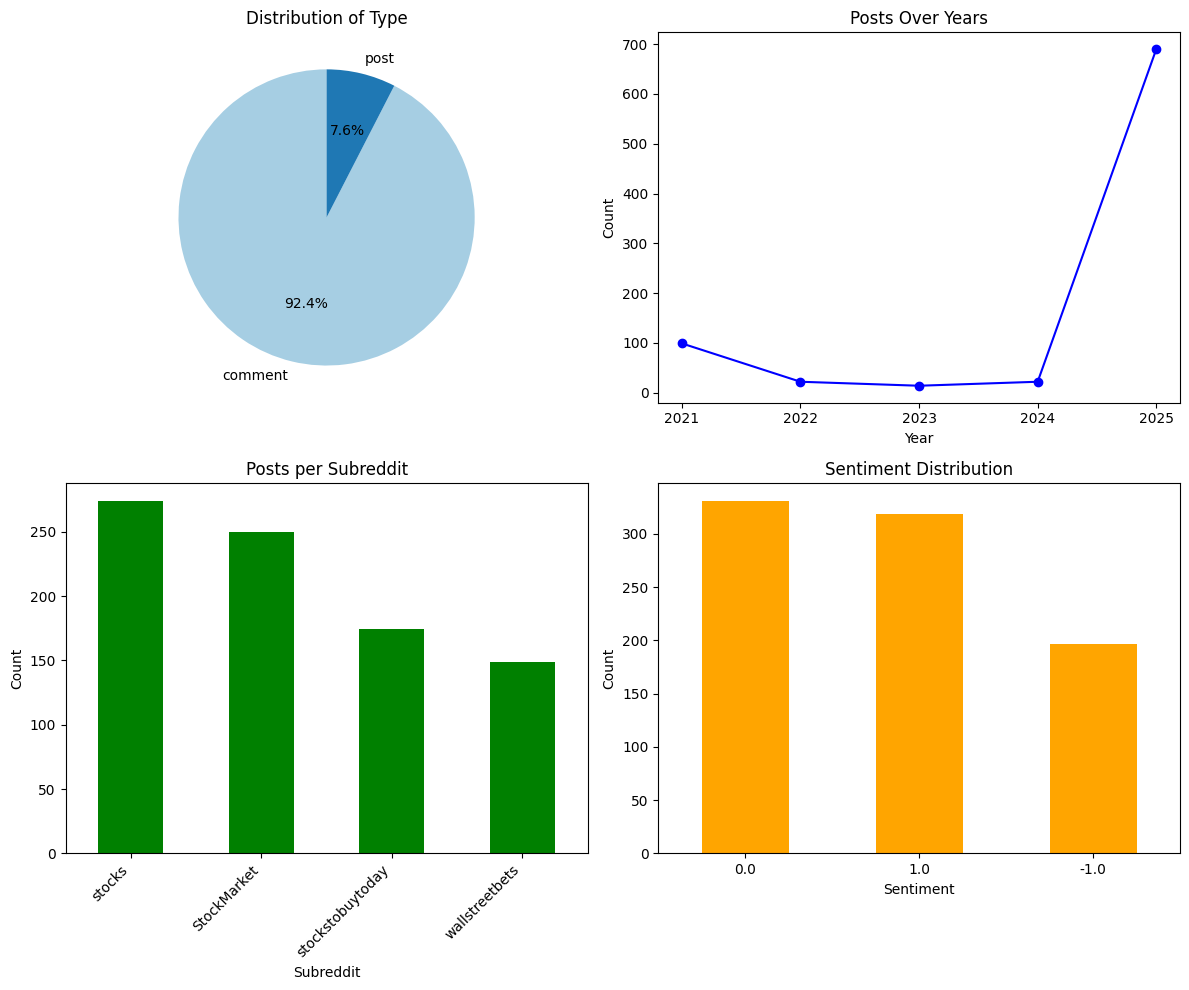

In [185]:
# Visualization of the above cout values
plt.figure(figsize=(12, 10))

#Type
plt.subplot(2, 2, 1)
type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Type')
plt.ylabel('')

#Datetime
from matplotlib.ticker import MaxNLocator
plt.subplot(2, 2, 2)
datetime_counts.plot(kind='line', marker='o', color='blue')
plt.title('Posts Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

#Subreddit
plt.subplot(2, 2, 3)
subreddit_counts.plot(kind='bar', color='green')
plt.title('Posts per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

#Sentiments
plt.subplot(2, 2, 4)
sentiment_counts.plot(kind='bar', color='orange')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

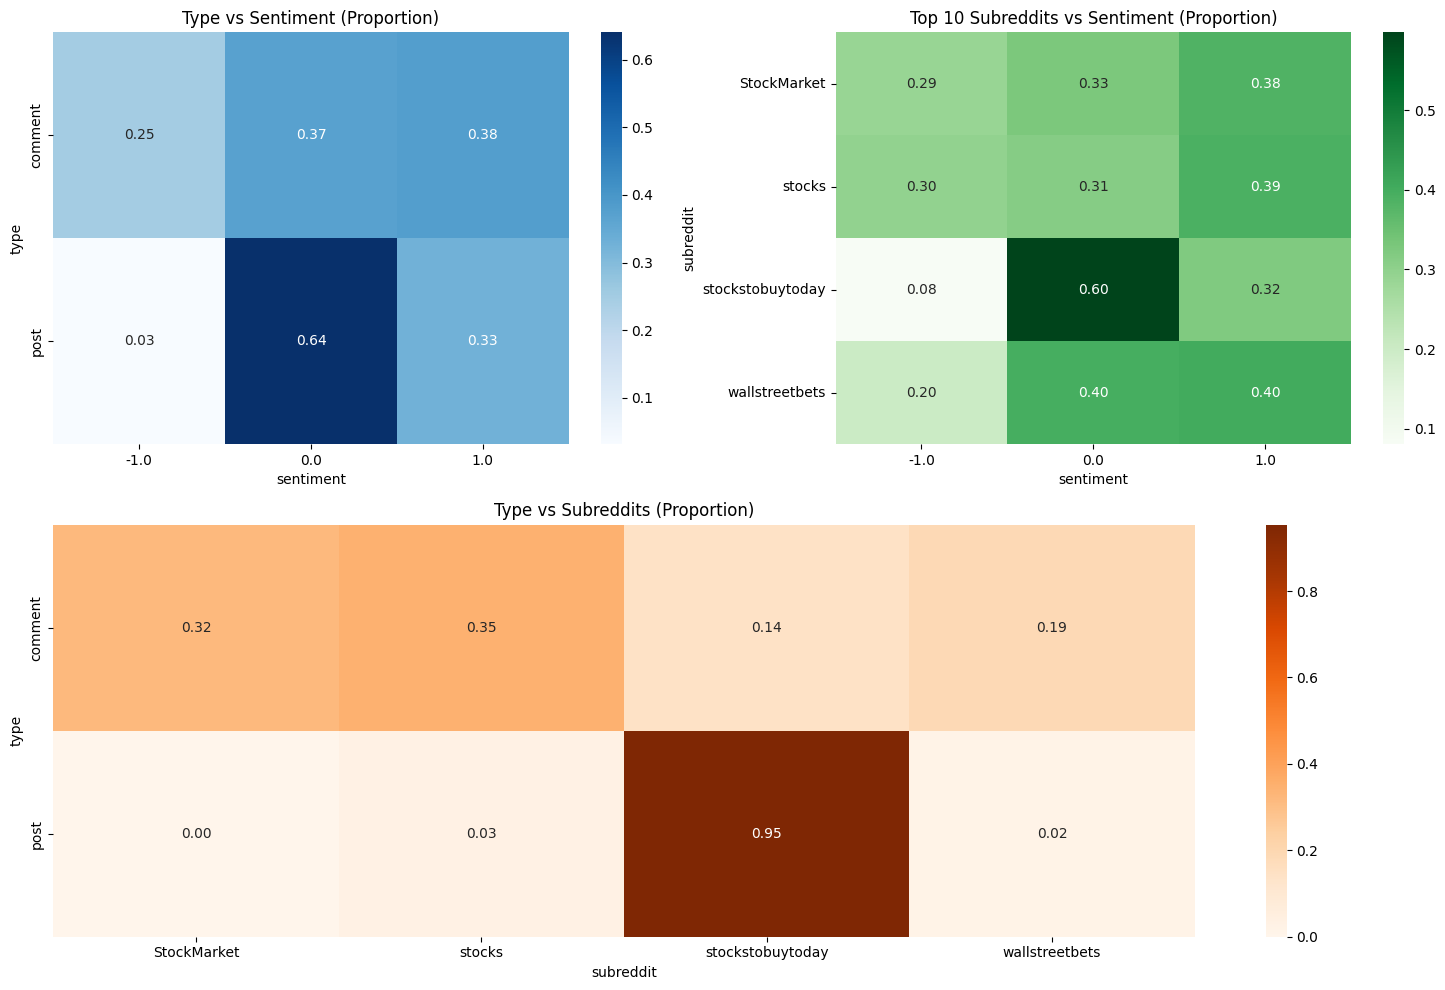

In [186]:
## The correlations among type, sentiment, and subreddit

# Crosstab between Type and Sentiment
ct_type_sentiment = pd.crosstab(new_df['type'], new_df['sentiment'], normalize='index')

# Crosstab between Subreddit and Sentiment (normalize within subreddit)
ct_subreddit_sentiment = pd.crosstab(new_df['subreddit'], new_df['sentiment'], normalize='index')

# Crosstab between Type and Subreddit (normalize within type)
ct_type_subreddit = pd.crosstab(new_df['type'], new_df['subreddit'], normalize='index')

import seaborn as sns
plt.figure(figsize=(15,10))

# Type vs Sentiment
plt.subplot(2,2,1)
sns.heatmap(ct_type_sentiment, annot=True, cmap="Blues", fmt=".2f")
plt.title("Type vs Sentiment (Proportion)")

# Subreddit vs Sentiment 
plt.subplot(2,2,2)
sns.heatmap(ct_subreddit_sentiment, annot=True, cmap="Greens", fmt=".2f")
plt.title("Top 10 Subreddits vs Sentiment (Proportion)")

# Type vs Subreddit
plt.subplot(2,1,2)
sns.heatmap(ct_type_subreddit, annot=True, cmap="Oranges",fmt=".2f")
plt.title("Type vs Subreddits (Proportion)")

plt.tight_layout()
plt.show()

   datetime         subreddit  count
0      2021            stocks     41
1      2021  stockstobuytoday     58
2      2022  stockstobuytoday     22
3      2023  stockstobuytoday     14
4      2024  stockstobuytoday     22
5      2025       StockMarket    250
6      2025            stocks    233
7      2025  stockstobuytoday     58
8      2025    wallstreetbets    149


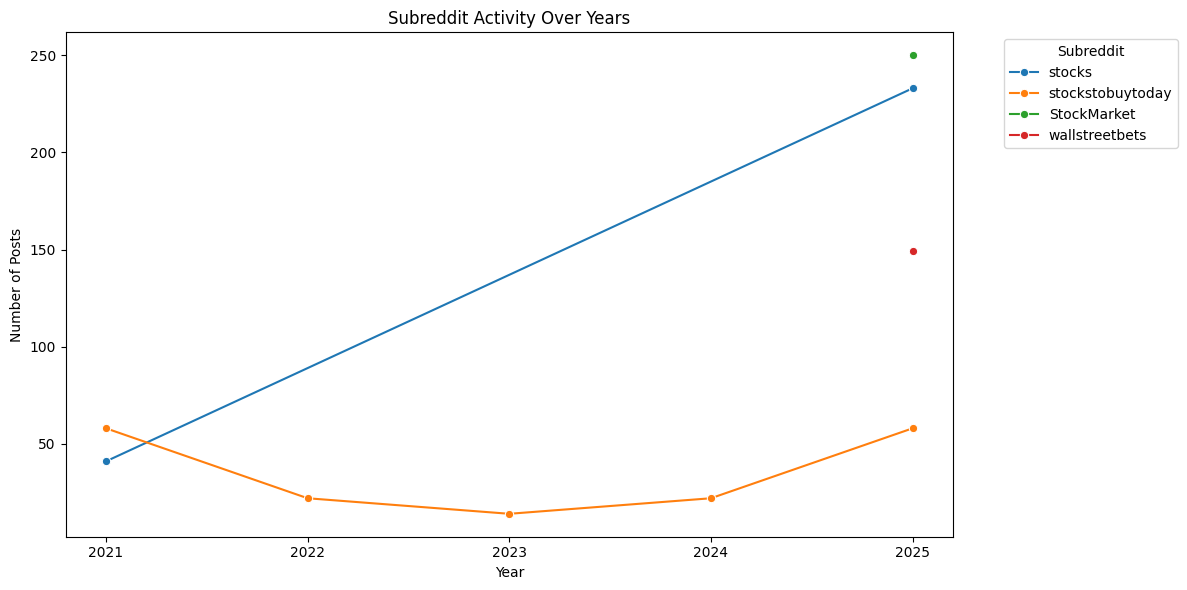

In [187]:
# Count posts per subreddit per year
subreddit_year = new_df.groupby(['datetime', 'subreddit']).size().reset_index(name='count')
print(subreddit_year)
plt.figure(figsize=(12, 6))
sns.lineplot(data=subreddit_year, x='datetime', y='count', hue='subreddit', marker='o')

plt.title("Subreddit Activity Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Posts")
plt.legend(title="Subreddit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

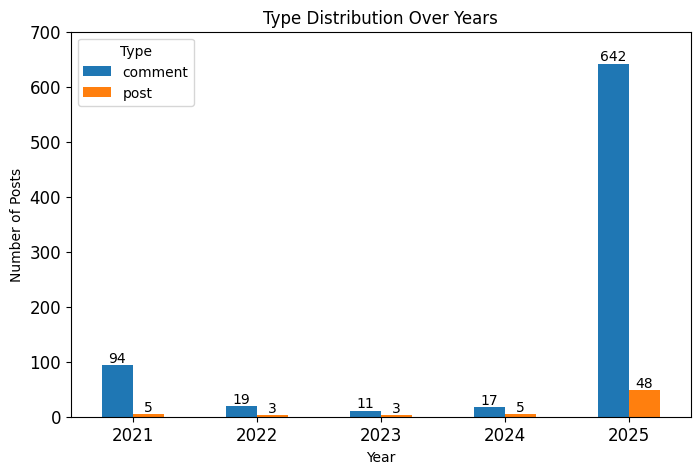

In [188]:
#Type Distribution over years

type_year_pivot = type_year.pivot(index='datetime', columns='type', values='count').fillna(0)

# Plot grouped bar chart
ax=type_year_pivot.plot(kind='bar', 
                     title='Type Distribution Over Years',
                     ylim=[0, 700],
                     rot=0,
                     fontsize=12,
                     figsize=(8,5))

plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.legend(title='Type')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, rotation=0)
plt.show()

## 3. Text feature creation

In [189]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hax16\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hax16\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [190]:
new_df['title_unigram'] = new_df['title'].apply(lambda x: dmh.tokenize_text(x))
new_df['text_unigram'] = new_df['text'].apply(lambda x: dmh.tokenize_text(x))

In [191]:
new_df[0:5]

,type,datetime,subreddit,title,text,sentiment,title_unigram,text_unigram
0,comment,2025,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,-1.0,"[Retardation, is, on, the, menu, boys, !, WSB,...","[Calls, on, retards]"
1,comment,2025,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,1.0,"[Retail, giant, TARGET, has, now, declined, fo...","[Stunt, as, in, like, why, did, they, even, ma..."
2,comment,2025,StockMarket,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.0,"[How, do, you, feel, about, a, sitting, presid...","[Seeing, lots, of, red, in, the, ticker, .]"
3,post,2023,stockstobuytoday,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,1.0,"[Who, knows, more, ?, $, VMAR]","[Vision, Marine, Technologies, Inc., is, rewri..."
4,comment,2025,StockMarket,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,0.0,"[The, Trump, administration, is, begging, Xi, ...","[He, didn, ’, t, say, thank, you, .]"


In [192]:
count_vect = CountVectorizer()
new_df_counts_text = count_vect.fit_transform(new_df.text)
print(new_df_counts_text[0])
print(new_df_counts_text.shape)

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1
(847, 4346)


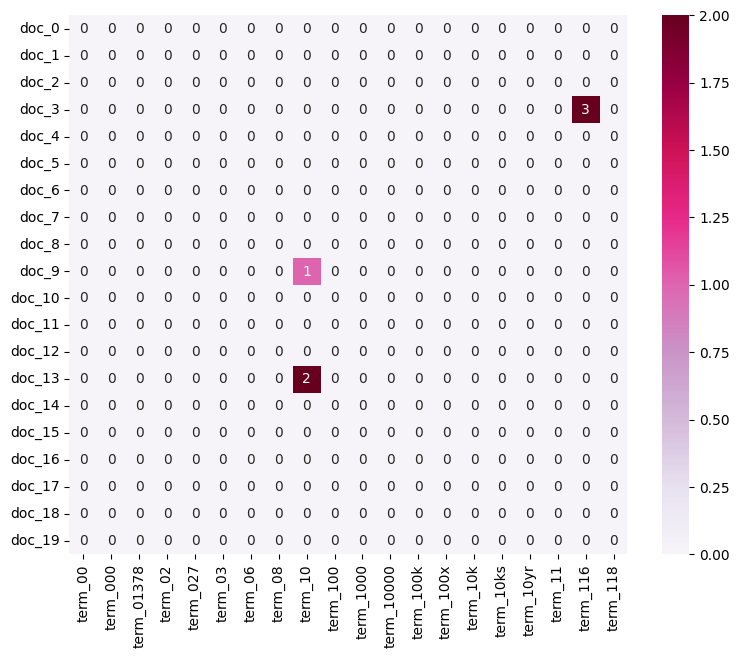

In [193]:
# Draw the first 20 terms in the first 20 docs of text
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(new_df.index)[0:20]]
plot_z = new_df_counts_text[0:20, 0:20].toarray()
new_df_text_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(new_df_text_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=2, annot=True)

  (np.int32(0), np.int32(423))	1
  (np.int32(0), np.int32(277))	2
  (np.int32(0), np.int32(361))	1
  (np.int32(0), np.int32(504))	1
  (np.int32(0), np.int32(321))	1
  (np.int32(0), np.int32(91))	1
  (np.int32(0), np.int32(589))	1
  (np.int32(0), np.int32(461))	1
  (np.int32(0), np.int32(74))	1
(847, 601)


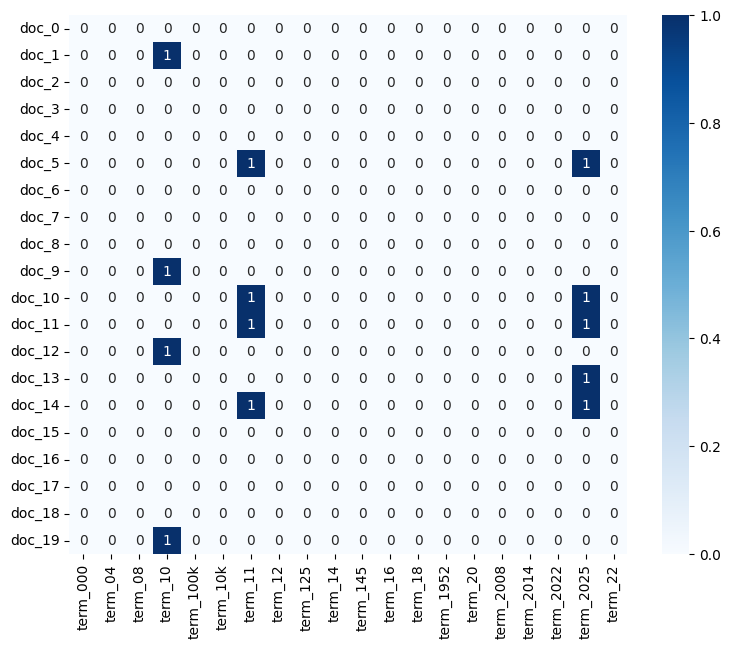

In [194]:
# Draw heatmap from the first 20 terms in the first 20 docs of title
new_df_counts_title = count_vect.fit_transform(new_df.title)
print(new_df_counts_title[0])
print(new_df_counts_title.shape)
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(new_df.index)[0:20]]
plot_z = new_df_counts_title[0:20, 0:20].toarray()
new_df_title_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(new_df_title_todraw,
                 cmap="Blues",
                 vmin=0, vmax=1, annot=True)

In [195]:
# Top 30 most frequent words (without stop words in English)
# Vectorizer for text
count_vect_text = CountVectorizer(stop_words="english")
text_counts = count_vect_text.fit_transform(new_df['text'])

# Vectorizer for title
count_vect_title = CountVectorizer(stop_words="english")
title_counts = count_vect_title.fit_transform(new_df['title'])

# Term frequencies
term_freq_text = np.asarray(text_counts.sum(axis=0)).flatten()
term_freq_title = np.asarray(title_counts.sum(axis=0)).flatten()

# Top 30 words
top_index_text = np.argsort(term_freq_text)[::-1][:30]
top_index_title = np.argsort(term_freq_title)[::-1][:30]

top_words_text = count_vect_text.get_feature_names_out()[top_index_text]
top_words_title = count_vect_title.get_feature_names_out()[top_index_title]

# Randomly sample 50 documents
np.random.seed(45)
sample_text = np.random.choice(text_counts.shape[0], 50, replace=False)
sample_title = np.random.choice(title_counts.shape[0], 50, replace=False)

# Extract top 30 word counts for sampled documents
z30_text = text_counts[sample_text[:, None], top_index_text].toarray()
z30_title = title_counts[sample_title[:, None], top_index_title].toarray()

print("z30_text shape:", z30_text.shape)
print("z30_title shape:", z30_title.shape)


z30_text shape: (50, 30)
z30_title shape: (50, 30)


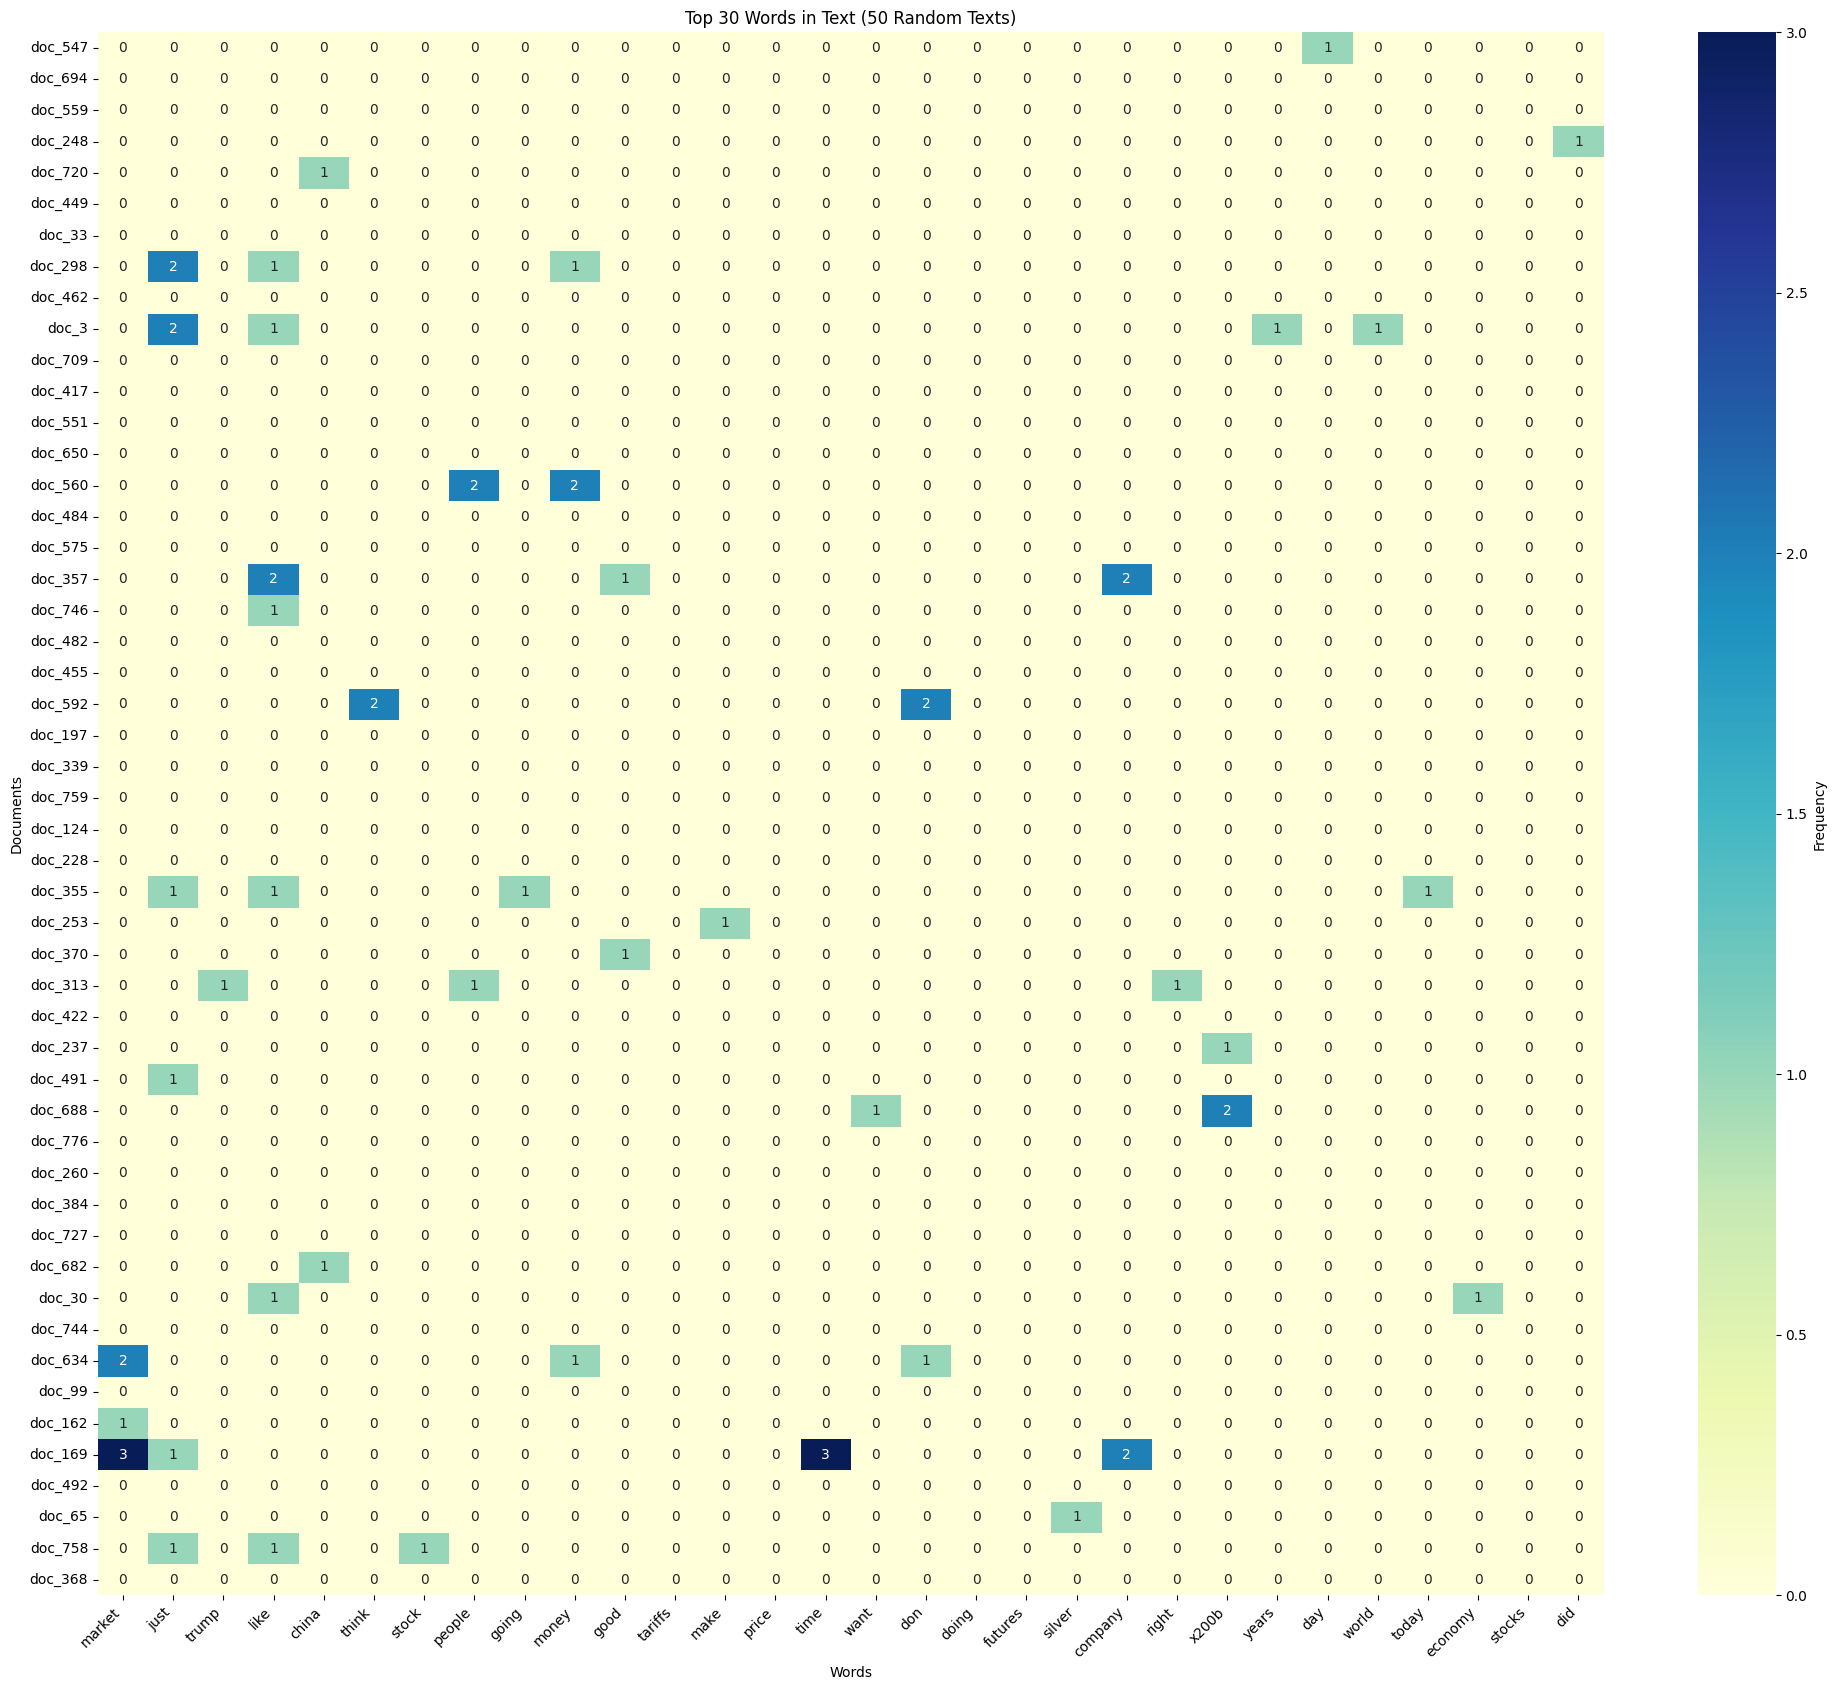

In [196]:
plt.figure(figsize=(20,17))
sns.heatmap(z30_text, 
            cmap="YlGnBu", vmin=0, vmax=3, annot=True,
            xticklabels=top_words_text, 
            yticklabels=[f"doc_{i}" for i in sample_text],
            cbar_kws={'label': 'Frequency'})
plt.title("Top 30 Words in Text (50 Random Texts)")
plt.xlabel("Words")
plt.ylabel("Documents")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

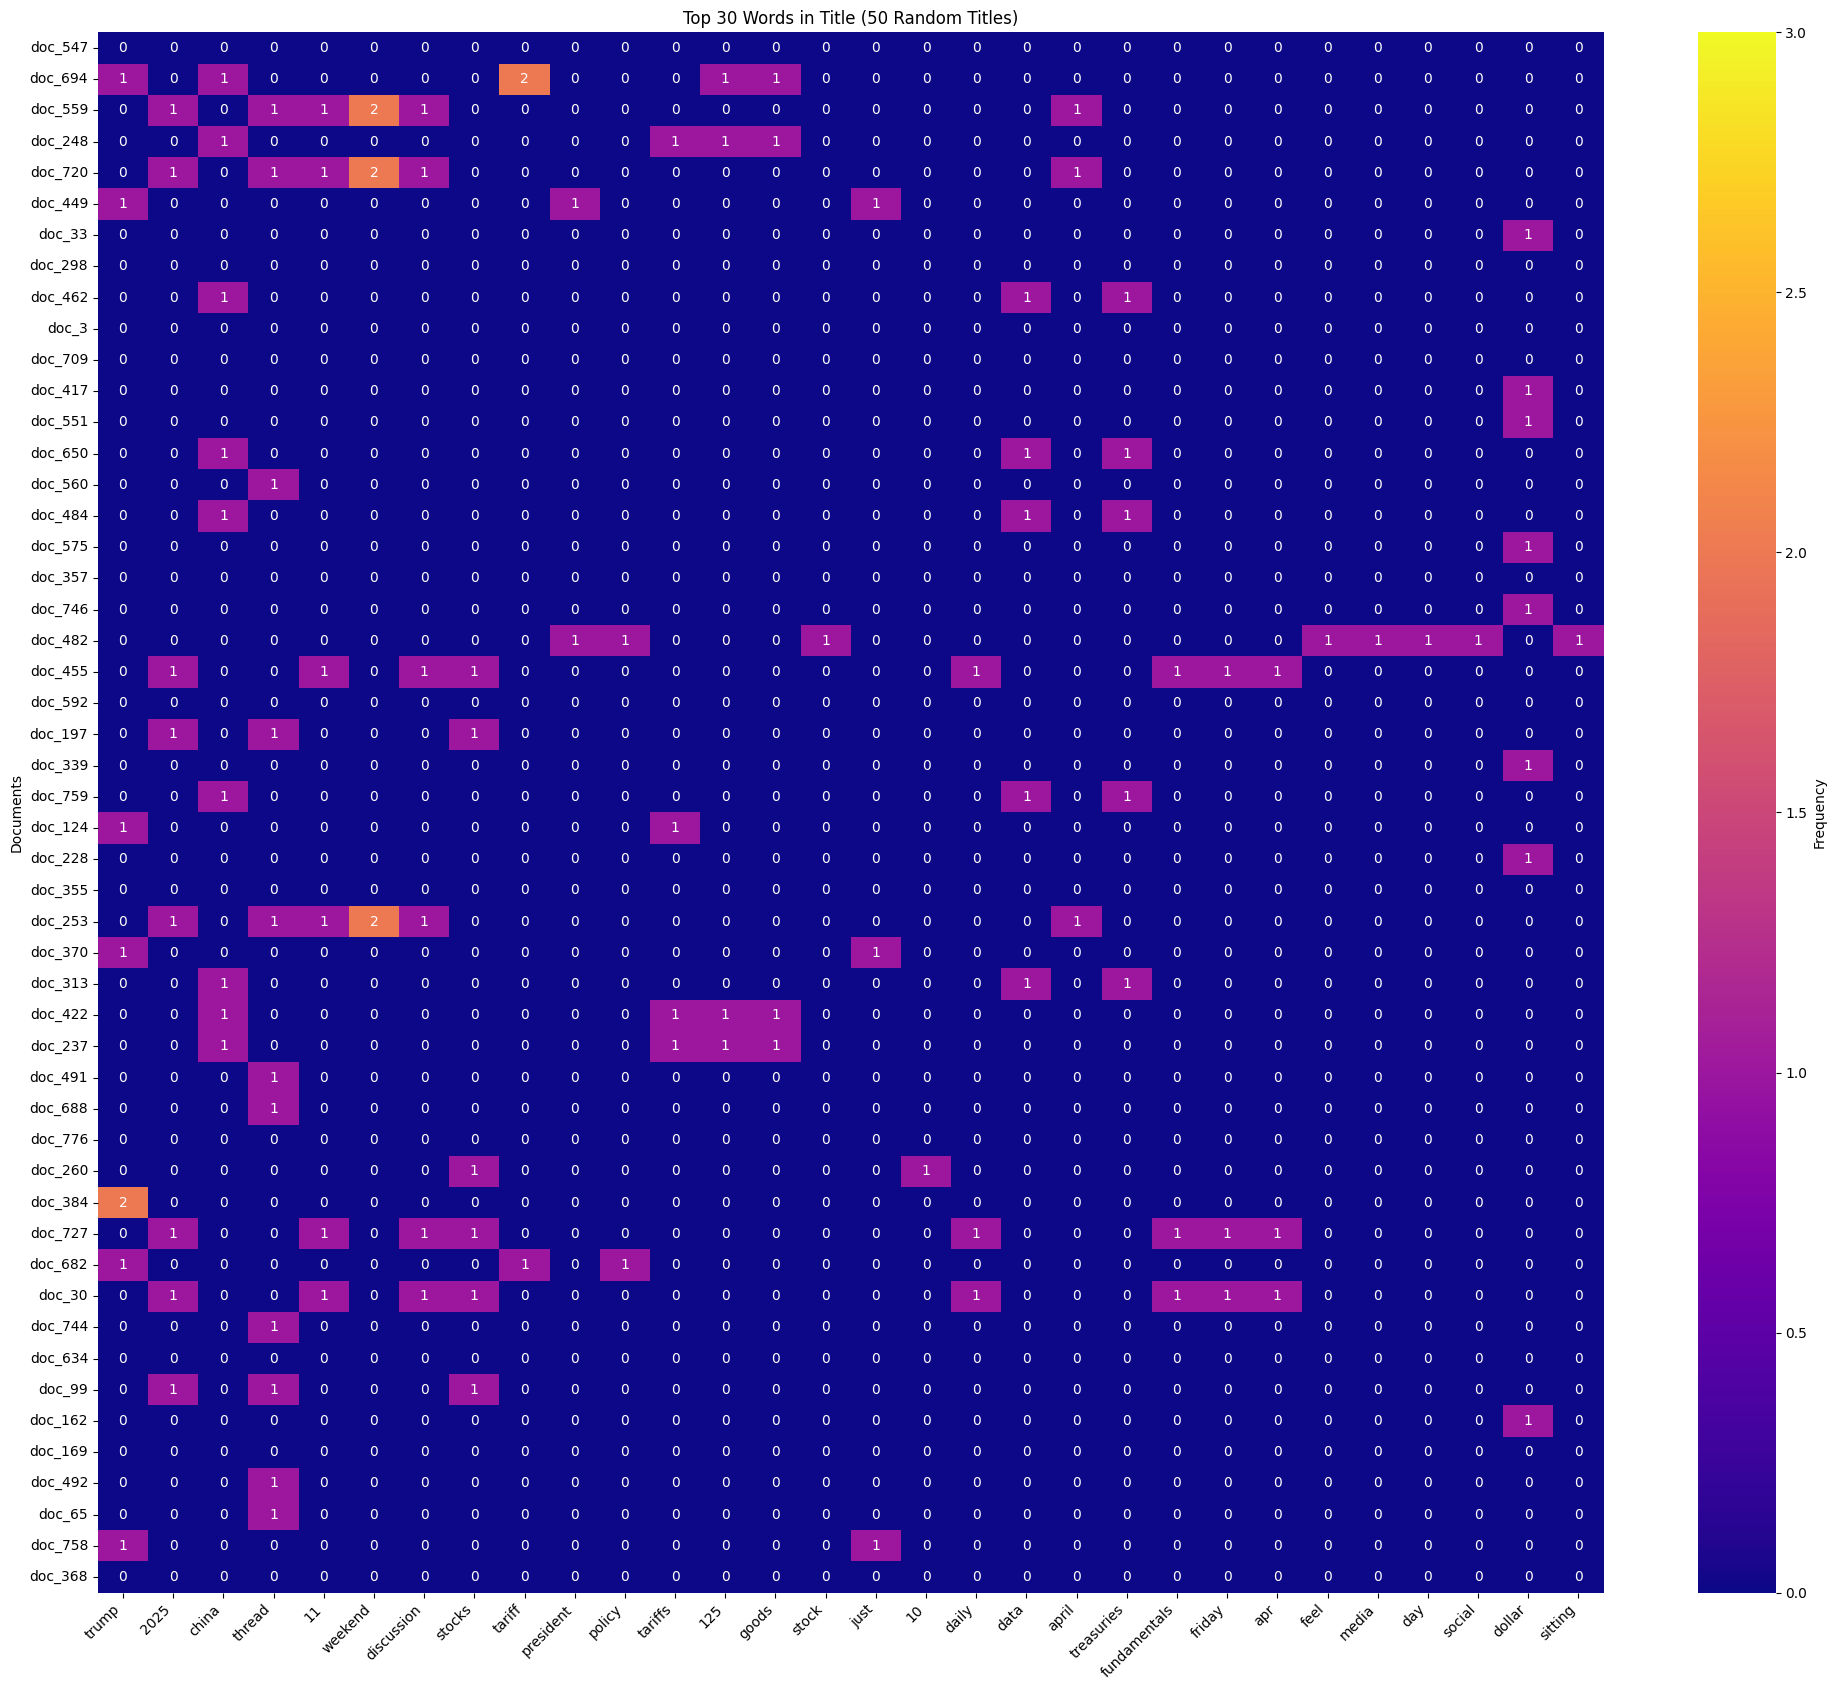

In [197]:
plt.figure(figsize=(20,17))
sns.heatmap(z30_title, 
            cmap="plasma", vmin=0, vmax=3, annot=True,
            xticklabels=top_words_title, 
            yticklabels=[f"doc_{i}" for i in sample_text],
            cbar_kws={'label': 'Frequency'})
plt.title("Top 30 Words in Title (50 Random Titles)")
plt.ylabel("Documents")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Number of overlapping words: 7
Overlapping words: ['china', 'day', 'just', 'stock', 'stocks', 'tariffs', 'trump']


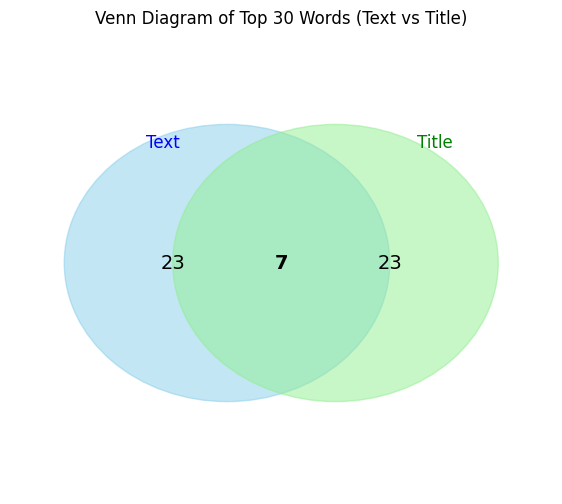

In [198]:
# Venn diagram to show Top 30 words in text and Top 30 words in title in whole new_df

import matplotlib.pyplot as plt

# Convert top words to sets
set_text = set(top_words_text)
set_title = set(top_words_title)

# Calculate intersections and differences
only_text = set_text - set_title
only_title = set_title - set_text
both = set_text & set_title

# Draw circles manually
fig, ax = plt.subplots(figsize=(7, 6))

circle1 = plt.Circle((0.4, 0.5), 0.3, color='skyblue', alpha=0.5)
circle2 = plt.Circle((0.6, 0.5), 0.3, color='lightgreen', alpha=0.5)

ax.add_patch(circle1)
ax.add_patch(circle2)

# Add text counts
plt.text(0.3, 0.5, f"{len(only_text)}", ha='center', va='center', fontsize=14)
plt.text(0.7, 0.5, f"{len(only_title)}", ha='center', va='center', fontsize=14)
plt.text(0.5, 0.5, f"{len(both)}", ha='center', va='center', fontsize=14, fontweight="bold")

# Titles
plt.text(0.25, 0.75, "Text", fontsize=12, color='blue')
plt.text(0.75, 0.75, "Title", fontsize=12, color='green')

plt.axis("off")
plt.title("Venn Diagram of Top 30 Words (Text vs Title)")

print(f"Number of overlapping words: {len(both)}")
print("Overlapping words:", sorted(both))

plt.show()



In [199]:
# Long-tail curve

terms_text = count_vect_text.get_feature_names_out()
terms_title = count_vect_title.get_feature_names_out()

sorted_idx_text = np.argsort(-term_freq_text)  # descending order
sorted_idx_title = np.argsort(-term_freq_title)

terms_sorted_text = terms_text[sorted_idx_text]
terms_sorted_title = terms_title[sorted_idx_title]

freqs_text = term_freq_text[sorted_idx_text]
freqs_title = term_freq_title[sorted_idx_title]

import math
freqs_text_log = [math.log(i) for i in freqs_text]
freqs_title_log = [math.log(i) for i in freqs_title]

x_text = terms_text
y_text = freqs_text
y_text_log = freqs_text_log

x_title = terms_title
y_title = freqs_title
y_title_log = freqs_title_log


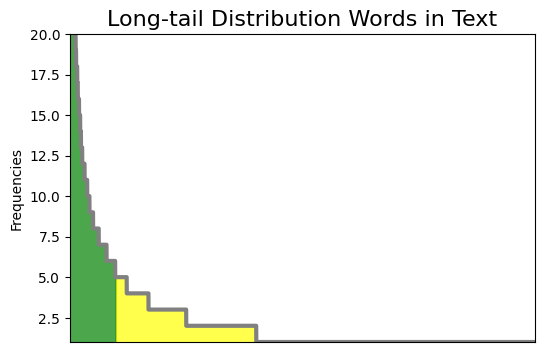

In [200]:
plt.figure(figsize=(6,4))

# Plot the smoothed long-tail curve for text
plt.plot(x_text, y_text, color='gray', linewidth=3)

# Fill the head region (first 10% of terms)
head_cutoff = int(len(x_text)*0.1)
plt.fill_between(x_text[:head_cutoff], y_text[:head_cutoff], color='green', alpha = 0.7)

# Fill the tail region (remaining 90% of terms)
plt.fill_between(x_text[head_cutoff:], y_text[head_cutoff:], color='yellow', alpha = 0.7)

plt.xlim(1, len(freqs_text))
plt.ylim(1, 20)
plt.ylabel('Frequencies')
plt.title("Long-tail Distribution Words in Text", fontsize=16)
plt.xticks([]) 
plt.show()

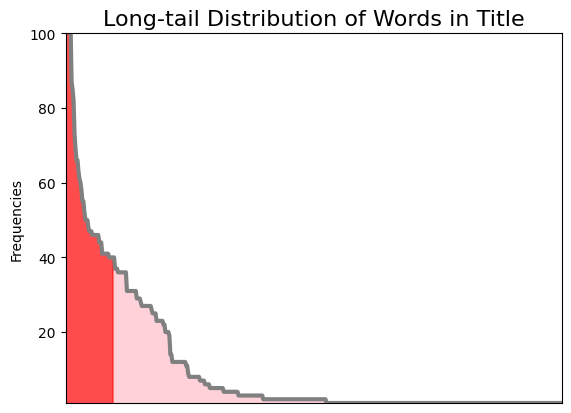

In [201]:
# Plot the smoothed long-tail curve for title
plt.plot(x_title, y_title, color='gray', linewidth=3)

# Fill the head region (first 10% of terms)
head_cutoff = int(len(x_title)*0.1)
plt.fill_between(x_title[:head_cutoff], y_title[:head_cutoff], color='red', alpha = 0.7)

# Fill the tail region (remaining 90% of terms)
plt.fill_between(x_title[head_cutoff:], y_title[head_cutoff:], color='pink', alpha = 0.7)

plt.xlim(1, len(freqs_title))
plt.ylim(1, 100)
plt.ylabel('Frequencies')
plt.title("Long-tail Distribution of Words in Title", fontsize=16)
plt.xticks([]) 
plt.show()

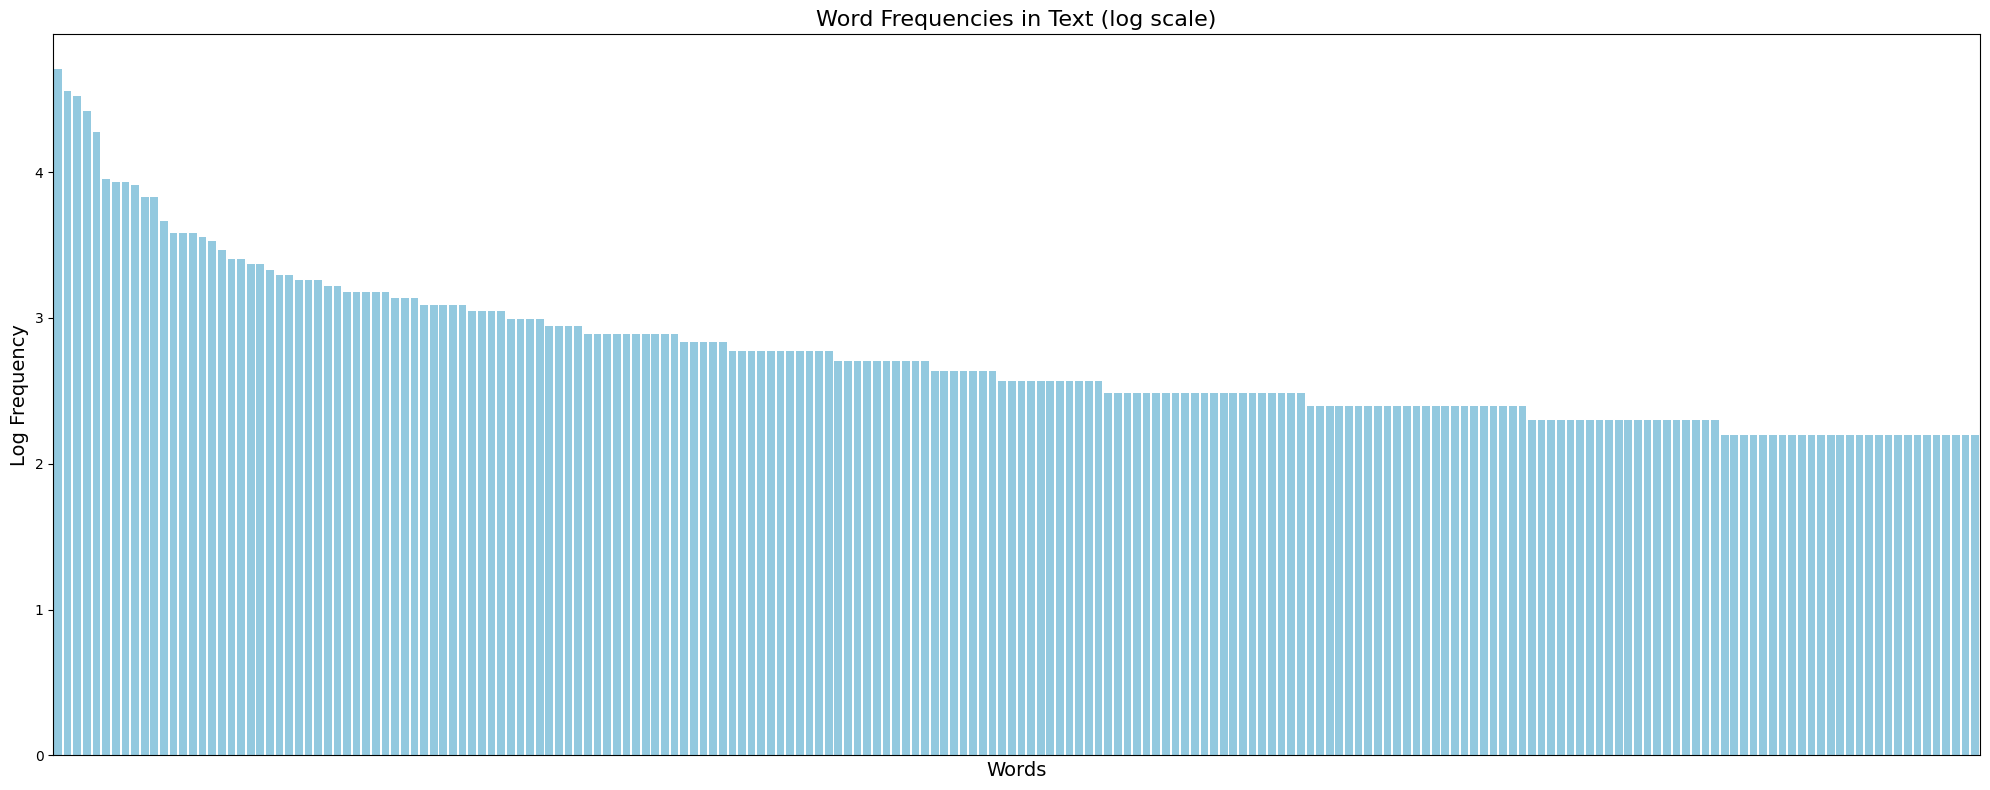

In [202]:
plt.figure(figsize=(20, 8))
g = sns.barplot(x=x_text[:200], y=y_text_log[:200], color="skyblue")
plt.xticks(rotation=90)
plt.title("Word Frequencies in Text (log scale)", fontsize=16)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Log Frequency", fontsize=14)
plt.xticks([]) 

plt.tight_layout()
plt.show()

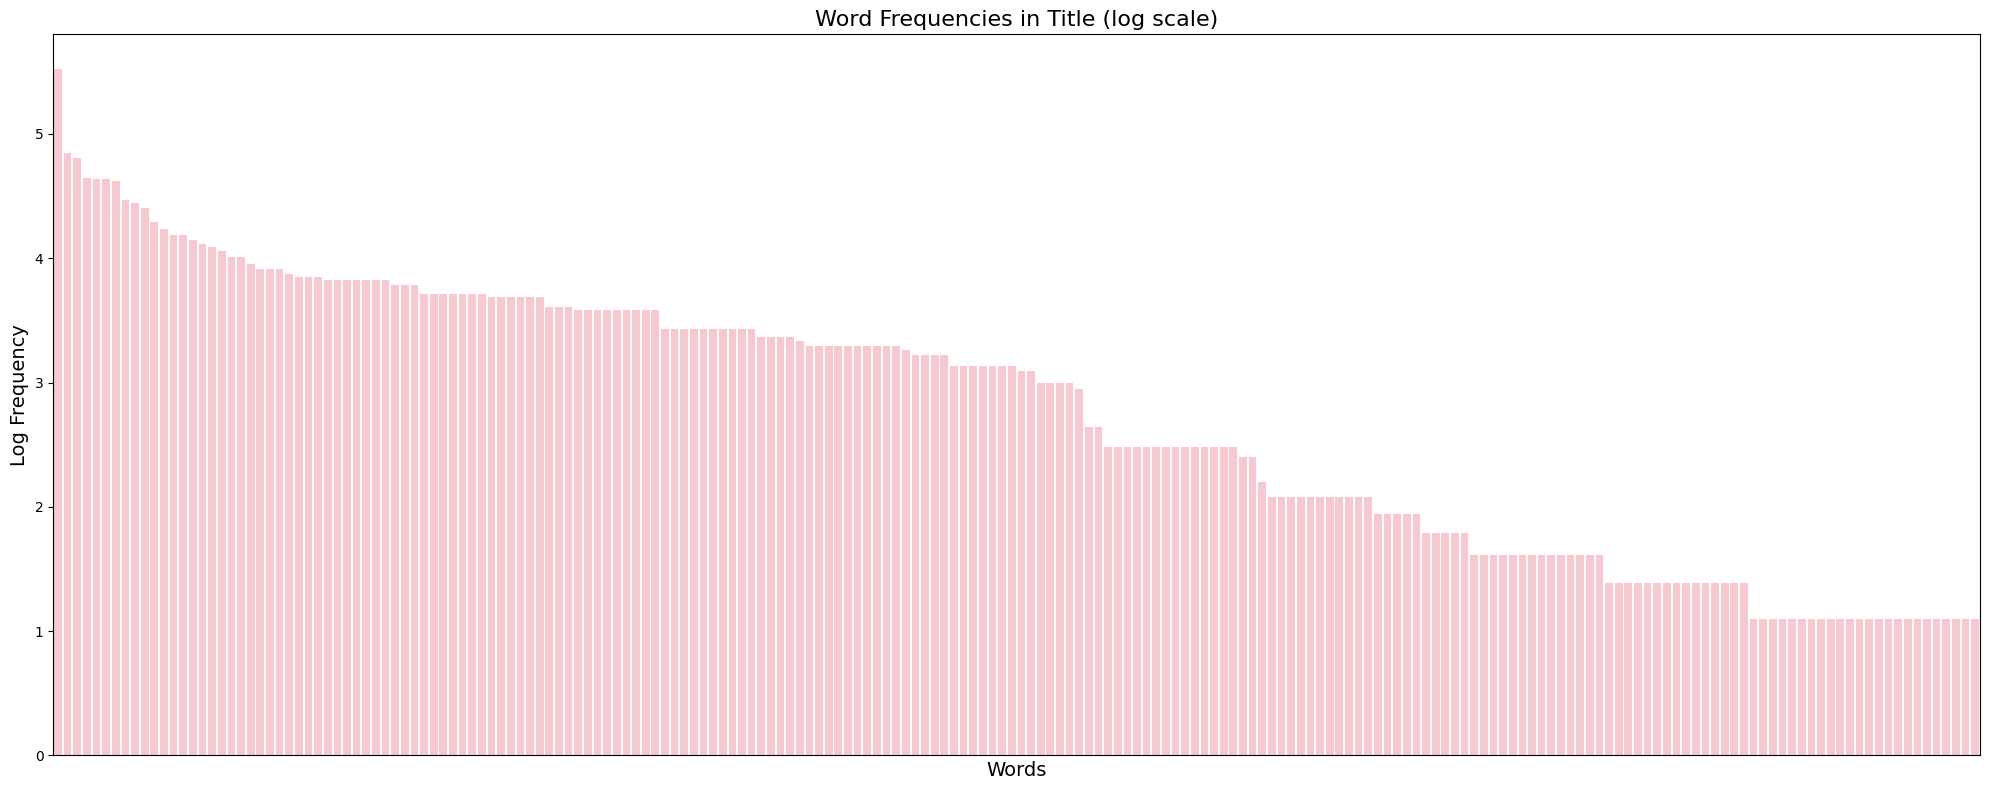

In [203]:
plt.figure(figsize=(20, 8))
g = sns.barplot(x=x_title[:200], y=y_title_log[:200], color="pink")
plt.xticks(rotation=90)
plt.title("Word Frequencies in Title (log scale)", fontsize=16)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Log Frequency", fontsize=14)
plt.xticks([]) 

plt.tight_layout()
plt.show()

## Try more

In [204]:
# Create Function to get top frequent words
def get_top_words(df, column, top_n=50, stop_words="english"):
    vect = CountVectorizer(stop_words=stop_words)
    counts = vect.fit_transform(df[column].dropna())
    term_freq = np.asarray(counts.sum(axis=0)).flatten()
    top_index = np.argsort(term_freq)[::-1][:top_n]
    words = vect.get_feature_names_out()[top_index]
    freqs = term_freq[top_index]
    return pd.DataFrame({"word": words, "frequency": freqs})

In [205]:
top50_text = get_top_words(new_df, "text", 50)
top50_title = get_top_words(new_df, "title", 50)

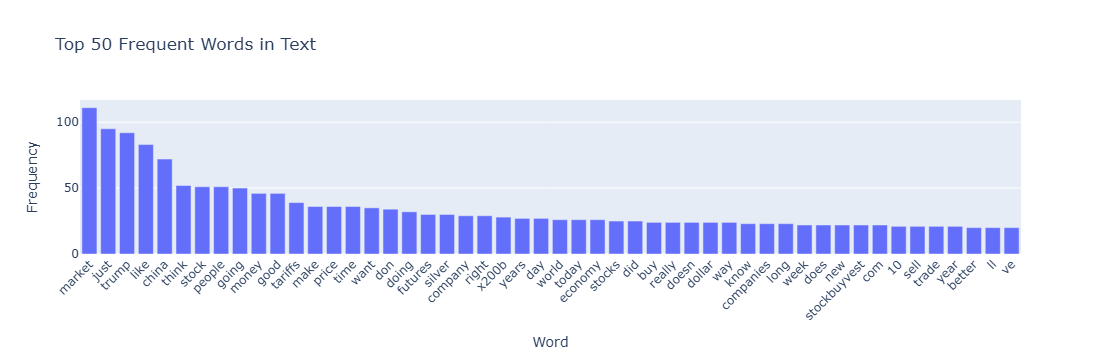

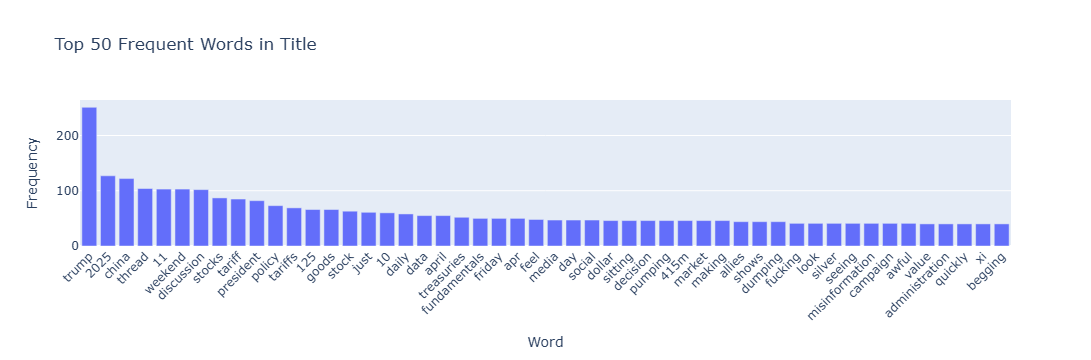

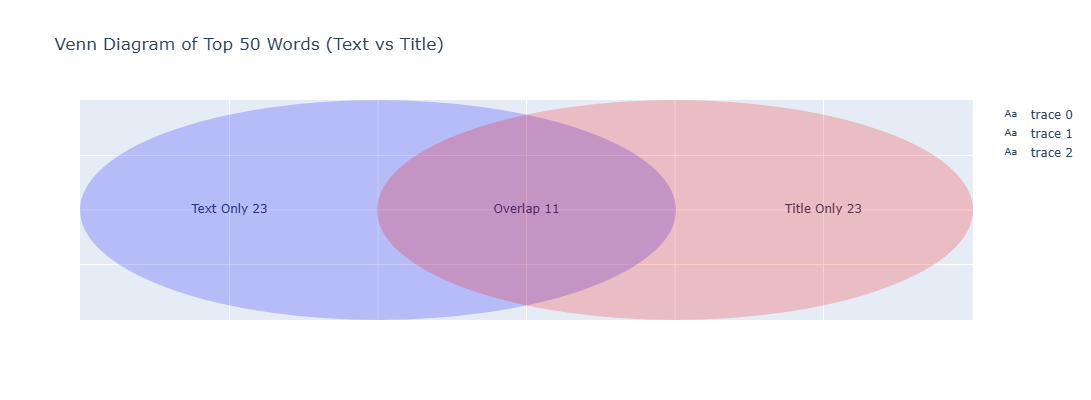

Overlapping words: ['10', 'china', 'day', 'dollar', 'just', 'market', 'silver', 'stock', 'stocks', 'tariffs', 'trump']


In [206]:
import plotly.express as px
import plotly.graph_objects as go

#Distribution of frequent words in Text and Title
fig_text = px.bar(top50_text, x="word", y="frequency", 
                  title="Top 50 Frequent Words in Text",
                  labels={"word": "Word", "frequency": "Frequency"})
fig_text.update_layout(xaxis_tickangle=-45)

fig_title = px.bar(top50_title, x="word", y="frequency", 
                   title="Top 50 Frequent Words in Title",
                   labels={"word": "Word", "frequency": "Frequency"})
fig_title.update_layout(xaxis_tickangle=-45)

fig_text.show()
fig_title.show()

# Venn diagram of top 50 words in Text and Title
# Circle for Text
set_text_50 = set(top50_text["word"])
set_title_50 = set(top50_title["word"])
overlap_50 = set_text_50 & set_title_50
only_text_50 = set_text_50 - set_title_50
only_title_50 = set_title_50 - set_text_50

fig = go.Figure()

# Add circles using layout.shapes
fig.update_layout(
    shapes=[
        dict(type="circle", xref="x", yref="y",
             x0=0, y0=0, x1=2, y1=2,
             line_color="blue", fillcolor="blue", opacity=0.2),
        dict(type="circle", xref="x", yref="y",
             x0=1, y0=0, x1=3, y1=2,
             line_color="red", fillcolor="red", opacity=0.2)
    ]
)

# Labels
fig.add_trace(go.Scatter(x=[0.5], y=[1], text=[f"Text Only\n{len(only_text)}"], mode="text"))
fig.add_trace(go.Scatter(x=[2.5], y=[1], text=[f"Title Only\n{len(only_title)}"], mode="text"))
fig.add_trace(go.Scatter(x=[1.5], y=[1], text=[f"Overlap\n{len(overlap_50)}"], mode="text"))

fig.update_layout(
    title="Venn Diagram of Top 50 Words (Text vs Title)",
    xaxis=dict(showticklabels=False, zeroline=False),
    yaxis=dict(showticklabels=False, zeroline=False),
    width=600, height=400
)

fig.show()

# Print overlapping Words
print("Overlapping words:", sorted(overlap_50))

## Phase 2

In [3]:
### Begin Assignment Here

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import plotly as py
import math
import PAMI
import umap
import helpers.data_mining_helpers as dmh

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hax16\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hax16\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
raw_df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
raw_df

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


In [3]:
new_df = raw_df[['type', 'datetime', 'subreddit', 'title', 'text', 'sentiment']].copy()

print("Shape (rows, columns):", new_df.shape)

cols_new = new_df.columns.tolist()
print("\nColumn titles:", cols_new)
new_df

Shape (rows, columns): (847, 6)

Column titles: ['type', 'datetime', 'subreddit', 'title', 'text', 'sentiment']


,type,datetime,subreddit,title,text,sentiment
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,-1.0
1,comment,2025-04-12 1:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,1.0
2,comment,2025-04-10 15:09:41,StockMarket,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.0
3,post,2023-08-30 17:12:55,stockstobuytoday,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,1.0
4,comment,2025-04-11 14:48:05,StockMarket,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,0.0
...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Invest now it is going to shoot up tomorrow,0.0
843,comment,2025-04-11 5:01:24,StockMarket,$ U.S. dollar value (crashing),Where can I read this?,0.0
844,post,2025-03-24 12:30:39,stockstobuytoday,Analyst Recommendations,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.0
845,comment,2025-04-11 20:13:26,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,i sold my puts so i expect cheeto to declare w...,0.0


# Finding frequent patterns

In [4]:
sentiment = new_df['sentiment'].unique()
sentiment

array([-1.,  1.,  0.])

In [5]:
# Map sentiment values to labels
sentiment_mapping = {-1.0: 'negative', 0.0: 'neutral', 1.0: 'positive'}
new_df['sentiment_modify'] = new_df['sentiment'].map(sentiment_mapping)
new_df[['sentiment', 'sentiment_modify']]

,sentiment,sentiment_modify
0,-1.0,negative
1,1.0,positive
2,0.0,neutral
3,1.0,positive
4,0.0,neutral
...,...,...
842,0.0,neutral
843,0.0,neutral
844,0.0,neutral
845,0.0,neutral


In [6]:
categories_text = new_df['sentiment_modify'].unique()
category_dfs = {}

#Create dataframes for each subreddit

for i in categories_text:
    category_dfs[i] = new_df[new_df['sentiment_modify']==i].copy()

def create_term_document_df(df):
    count_vect = CountVectorizer()
    df_counts = count_vect.fit_transform(df['text'])
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(df_counts.toarray(), columns = words)
    return term_document_df

filt_term_document_dfs = {}

for i in categories_text:
    filt_term_document_dfs[i] = create_term_document_df(category_dfs[i])

In [7]:
categories_text

array(['negative', 'positive', 'neutral'], dtype=object)

In [8]:
for i in categories_text:
    print(f"Filtered Term-Document Frequency DataFrame for Sentiment {i}:")
    print(filt_term_document_dfs[i])
    print('\n')

Filtered Term-Document Frequency DataFrame for Sentiment negative:
     01378  027  10  100  100k  100x  11  12  125  13  ...  yields  yikes  \
0        0    0   0    0     0     0   0   0    0   0  ...       0      0   
1        0    0   0    0     0     0   0   0    0   0  ...       0      0   
2        0    0   0    0     0     0   0   0    0   0  ...       0      0   
3        0    0   0    0     0     0   0   0    0   0  ...       0      0   
4        0    0   0    0     0     0   0   0    0   0  ...       0      0   
..     ...  ...  ..  ...   ...   ...  ..  ..  ...  ..  ...     ...    ...   
192      0    0   0    0     0     0   0   0    0   0  ...       0      0   
193      0    0   0    0     0     0   0   0    0   0  ...       0      0   
194      0    0   0    0     0     0   0   0    0   0  ...       0      0   
195      0    0   0    0     0     0   0   0    0   0  ...       0      0   
196      0    0   0    0     0     0   0   0    0   0  ...       0      0   

     yip

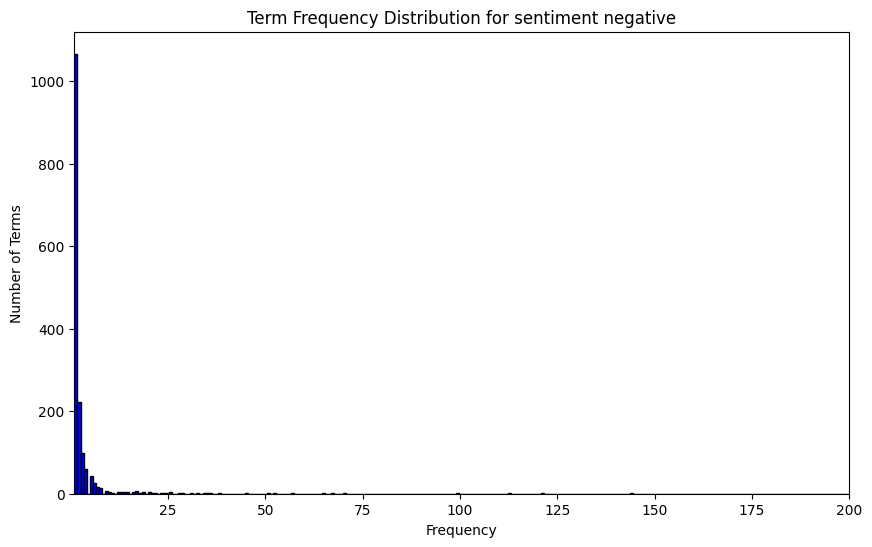

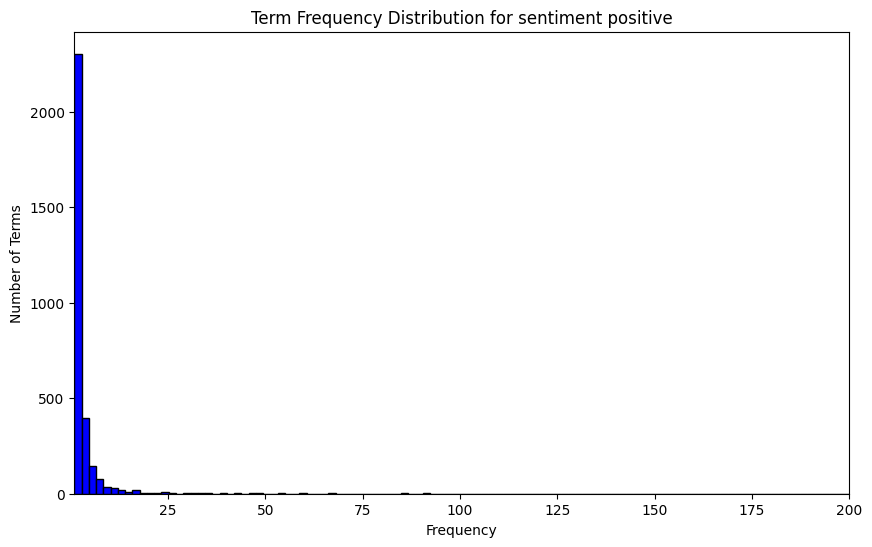

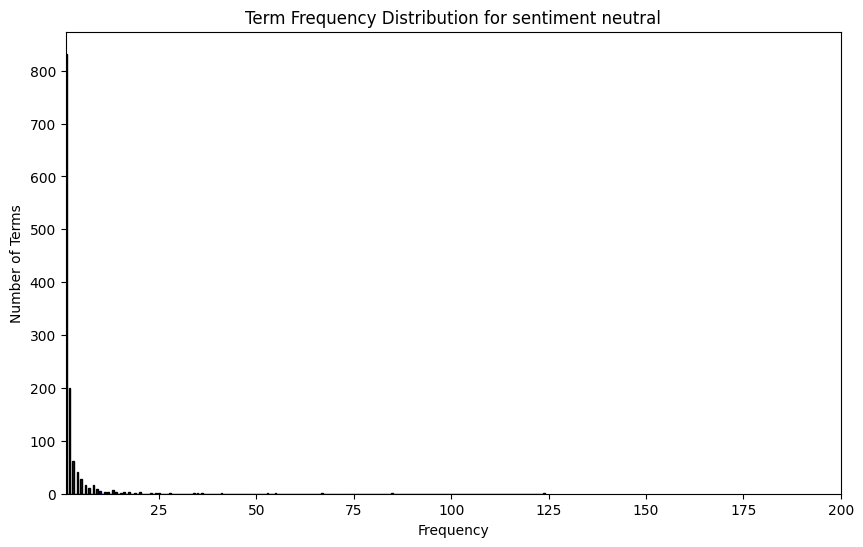

In [9]:
for i in categories_text:
    word_counts = filt_term_document_dfs[i].sum(axis=0).to_numpy()
    plt.figure(figsize=(10, 6))
    plt.hist(word_counts,bins=300, color='blue', edgecolor='black')
    plt.title(f'Term Frequency Distribution for sentiment {i}')
    plt.xlabel('Frequency')
    plt.ylabel('Number of Terms')
    plt.xlim(1, 200)
    plt.show()

In [10]:
#Top 5% most common words in each sentiment

for i in categories_text:
    word_counts = filt_term_document_dfs[i].sum(axis=0).to_numpy()
    
    # Sort the term frequencies in descending order
    sorted_indices = np.argsort(word_counts)[::-1]
    sorted_counts = np.sort(word_counts)[::-1]
    
    # Calculate the index corresponding to the top 5% most frequent terms
    total_terms = len(sorted_counts)

    # Get the indices of the top 5% most frequent terms
    total_terms = len(sorted_counts)
    top_5_percent_index = int(0.05 * total_terms)
    top_5_percent_indices = sorted_indices[:top_5_percent_index]

    # Filter terms that belong to the top 5% based on their rank
    filtered_words = [filt_term_document_dfs[i].iloc[:, j].name for j in top_5_percent_indices]

    print(f'Sentiment: {i}')
    print(f'Number of terms in top 5%: {top_5_percent_index}')
    print(f'Filtered terms: {filtered_words}')
    print('Sorted counts of these words: ', sorted_counts[:top_5_percent_index])
    print('\n')


Sentiment: negative
Number of terms in top 5%: 81
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'in', 'of', 'that', 'this', 'you', 'for', 'he', 'are', 'trump', 'if', 'they', 'so', 'be', 'on', 'will', 'but', 'as', 'can', 'just', 'not', 'us', 'with', 'what', 'have', 'like', 'at', 'all', 'his', 'was', 'my', 'think', 'about', 'or', 'an', 'now', 'people', 're', 'even', 'china', 'bad', 'we', 'going', 'their', 'has', 'when', 'no', 'more', 'tariffs', 'from', 'fuck', 'market', 'him', 'up', 'than', 'money', 'there', 'see', 'how', 'do', 'one', 'out', 'by', 'silver', 'only', 'why', 'go', 'shit', 'still', 'me', 'long', 'down', 'economy', 'some', 'want', 'too', 'time']
Sorted counts of these words:  [236 144 121 113  99  70  67  65  57  52  51  45  38  36  35  35  34  33
  33  31  29  28  26  26  26  26  26  25  24  24  23  22  21  21  20  20
  20  19  19  19  19  18  18  17  17  17  17  17  17  17  16  16  16  15
  15  15  15  14  14  14  13  13  13  13  12  12  12  12  12  11  11  10
  10  10  

In [11]:
# 1% the least common words in each sentiment

for i in categories_text:
    word_counts = filt_term_document_dfs[i].sum(axis=0).to_numpy()
    
    # Sort the term frequencies in descending order
    sorted_indices = np.argsort(word_counts)
    sorted_counts = np.sort(word_counts)

    # Get the indices of the top 5% most frequent terms
    total_terms = len(sorted_counts)
    bottom_1_percent_index = int(0.01 * total_terms)
    bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

    # Filter terms that belong to the top 5% based on their rank
    filtered_words = [filt_term_document_dfs[i].iloc[:, j].name for j in bottom_1_percent_indices]

    print(f'Sentiment: {i}')
    print(f'Number of terms in the least common words (1%): {bottom_1_percent_index}')
    print(f'Filtered terms: {filtered_words}')
    print('Sorted counts of these words: ', sorted_counts[:bottom_1_percent_index])
    print('\n')


Sentiment: negative
Number of terms in the least common words (1%): 16
Filtered terms: ['027', 'wonder', 'wont', 'word', 'shuttering', 'worked', 'working', 'yup', 'willingly', 'willingness', 'windows', 'wit', 'youtube', 'within', 'yourselves', 'wobbling']
Sorted counts of these words:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Sentiment: positive
Number of terms in the least common words (1%): 31
Filtered terms: ['blatant', 'wmt', 'wobbly', 'woefully', 'woke', 'oversight', 'women', 'owned', 'owner', 'wonders', 'wont', 'paced', 'packed', 'painful', 'worked', 'panama', 'panicked', 'paranoid', 'partial', 'worst', 'partially', 'participants', 'partner', 'wow', 'pass', 'passed', 'passion', 'passport', 'wrote', 'patient', 'ww2']
Sorted counts of these words:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Sentiment: neutral
Number of terms in the least common words (1%): 12
Filtered terms: ['2025', 'words', 'remove', 'recession', 'working', 'works', '00', 'worry', 'yup', 'wilder

In [12]:
#Filter bottom 1% and top 5% words in each sentiment

def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}')
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') 
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for i in categories_text:
    print(f'\nFor sentiment {i} we filter the following words:')
    term_document_dfs[i] = filter_top_bottom_words_by_sum(filt_term_document_dfs[i])

    #Display the filtered DataFrame for one of the categories
    print(f"Filtered Term-Document Frequency DataFrame for Sentiment {i}:")
    print(term_document_dfs[i])


For sentiment negative we filter the following words:
Bottom 1.0% words: 
027            1
wonder         1
wont           1
word           1
shuttering     1
worked         1
working        1
yup            1
willingly      1
willingness    1
windows        1
wit            1
youtube        1
within         1
yourselves     1
wobbling       1
dtype: int64
Top 5.0% words: 
time         9
too          9
want         9
some         9
economy      9
          ... 
it          99
is         113
and        121
to         144
the        236
Length: 81, dtype: int64
Filtered Term-Document Frequency DataFrame for Sentiment negative:
     01378  10  100  100k  100x  11  12  125  13  140  ...  years  yelling  \
0        0   0    0     0     0   0   0    0   0    0  ...      0        0   
1        0   0    0     0     0   0   0    0   0    0  ...      0        0   
2        0   0    0     0     0   0   0    0   0    0  ...      0        0   
3        0   0    0     0     0   0   0    0   0    0 

In [13]:
from PAMI.extras.convert.DF2DB import DF2DB  

import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open

from PAMI.extras.dbStats import TransactionalDatabase as tds

Terms dataframe frequency - Sentiment negative
Database size (total no of transactions) : 196
Number of items : 1534
Minimum Transaction Size : 1
Average Transaction Size : 12.908163265306122
Maximum Transaction Size : 65
Standard Deviation Transaction Size : 10.748124406567815
Variance in Transaction Sizes : 116.11459968602826
Sparsity : 0.991585291222095


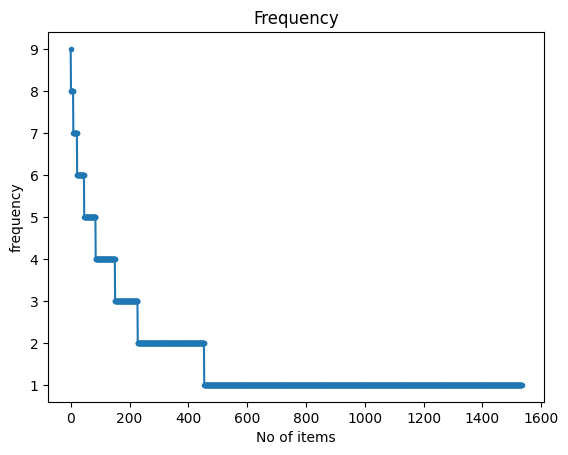

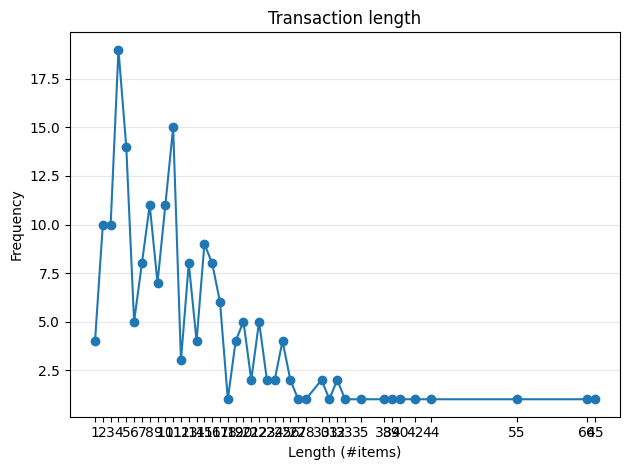



Terms dataframe frequency - Sentiment positive
Database size (total no of transactions) : 317
Number of items : 2940
Minimum Transaction Size : 1
Average Transaction Size : 16.687697160883282
Maximum Transaction Size : 199
Standard Deviation Transaction Size : 22.362801612471582
Variance in Transaction Sizes : 501.6774747434413
Sparsity : 0.9943239125303118


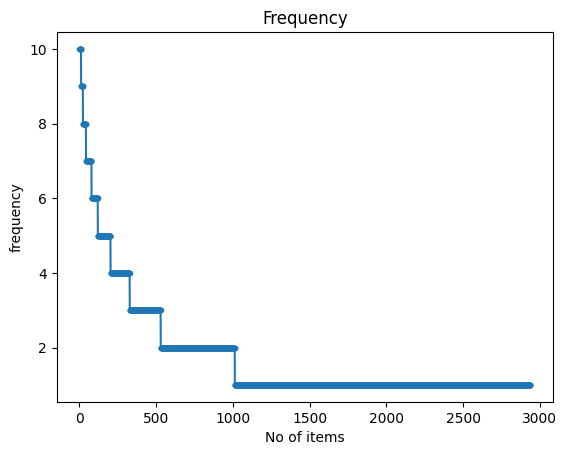

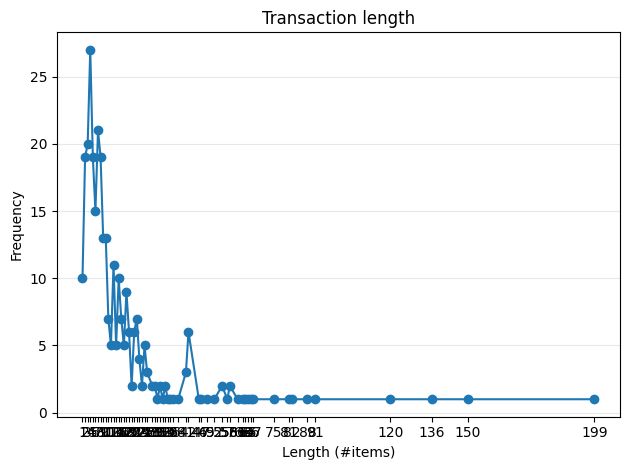



Terms dataframe frequency - Sentiment neutral
Database size (total no of transactions) : 326
Number of items : 1192
Minimum Transaction Size : 1
Average Transaction Size : 5.901840490797546
Maximum Transaction Size : 32
Standard Deviation Transaction Size : 4.781373270821356
Variance in Transaction Sizes : 22.93187352524776
Sparsity : 0.9950487915345658


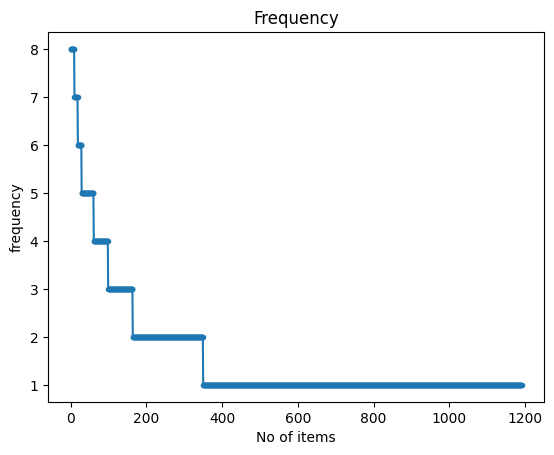

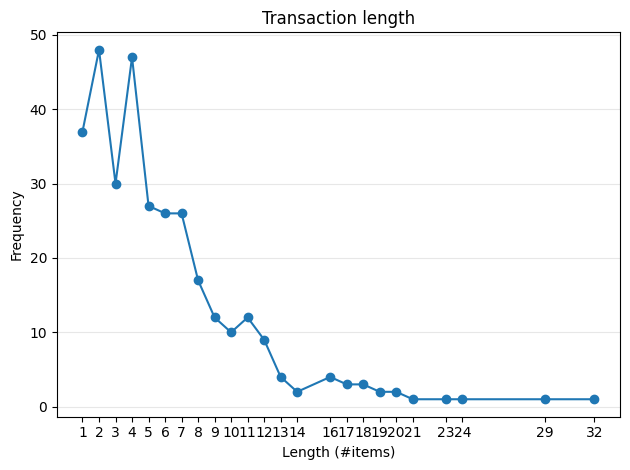

In [14]:
for i in categories_text:
    obj = DF2DB(term_document_dfs[i])               
    obj.convert2TransactionalDatabase(f'frequent_{i}.csv', '>=', 1)
    obj = tds.TransactionalDatabase(f'frequent_{i}.csv')
    obj.run()
    print(f'Terms dataframe frequency - Sentiment {i}')
    obj.printStats()
    obj.plotGraphs()
    print('\n')

In [15]:
from PAMI.frequentPattern.topk import FAE  as alg
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg

In [16]:
summary = pd.DataFrame(columns=['file','algorithm','MinSup/Top-K', 'Patterns', 'runtime', 'memory'])

In [17]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=[5,7]
input_files = ['frequent_neutral.csv', 'frequent_positive.csv', 'frequent_negative.csv']
frequentPatternsDict = {}

for file in input_files:
    for i in minSup:
        obj = alg.FPGrowth(iFile=file, minSup=i, sep='\t')
        obj.mine()
        key = (file, i)
        frequentPatternsDict[key] = obj.getPatternsAsDataFrame()
        summary.loc[summary.shape[0]]=[file, 'FPGrowth', i, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]
        df = frequentPatternsDict[key]
        print(f'Apply FPGrowth for {file} - minSup {i}')
        print('Total No of patterns: ' + str(len(df))) #print the total number of patterns
        print('Runtime: ' + str(obj.getRuntime()))
        print(f'DataFrame shape: {df.shape}')
        print("\nFirst few rows of the DataFrame:\n")
        print(df.head(5))
        obj.save(f'FPGrowth_MinSup_{i}_{file}.txt')
        print(f'Patterns saved to FPGrowth_MinSup_{i}_{file}.txt')
        print('\n')

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Apply FPGrowth for frequent_neutral.csv - minSup 5
Total No of patterns: 2101
Runtime: 0.0064661502838134766
DataFrame shape: (2101, 2)

First few rows of the DataFrame:

  Patterns  Support
0     down        5
1      did        5
2     time        5
3    money        5
4    think        5
Patterns saved to FPGrowth_MinSup_5_frequent_neutral.csv.txt


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Apply FPGrowth for frequent_neutral.csv - minSup 7
Total No of patterns: 19
Runtime: 0.0059833526611328125
DataFrame shape: (19, 2)

First few rows of the DataFrame:

     Patterns  Support
0        want        7
1        when        7
2      stocks        7
3        even        7
4  highlights        7
Patterns saved to FPGrowth_MinSup_7_frequent_neutral.csv.txt


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Apply FPGrowth for frequen

In [18]:
# FAE Top-K mining algorithm

from PAMI.frequentPattern.topk import FAE  as alg
input_files = ['frequent_neutral.csv', 'frequent_positive.csv', 'frequent_negative.csv']
kCount=[7, 10, 100]
frequentPatternsDict = {}

algorithm = 'FAE'
for file in input_files:
    for i in kCount:
        obj = alg.FAE(iFile=file, k=i, sep='\t')
        obj.mine()
        key = (file, i)
        frequentPatternsDict[key] = obj.getPatternsAsDataFrame()
        summary.loc[summary.shape[0]]=[file, 'FAE', i, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]
        df = frequentPatternsDict[key]
        print(f'Apply FAE top {i} for {file}')
        print('Total No of patterns: ' + str(len(df))) #print the total number of patterns
        print('Runtime: ' + str(obj.getRuntime()))
        print(f'DataFrame shape: {df.shape}')
        print("\nFirst few rows of the DataFrame:\n")
        print(df.head(5))
        obj.save(f'FAE_top{i}_{file}.txt')
        print(f'Patterns saved to FPGrowth_MinSup_{i}_{file}.txt')
        print('\n')

 TopK frequent patterns were successfully generated using FAE algorithm.
Apply FAE top 7 for frequent_neutral.csv
Total No of patterns: 7
Runtime: 0.002111673355102539
DataFrame shape: (7, 2)

First few rows of the DataFrame:

  Patterns  Support
0      now        8
1       go        8
2    still        8
3    their        8
4       us        8
Patterns saved to FPGrowth_MinSup_7_frequent_neutral.csv.txt


 TopK frequent patterns were successfully generated using FAE algorithm.
Apply FAE top 10 for frequent_neutral.csv
Total No of patterns: 10
Runtime: 0.001577615737915039
DataFrame shape: (10, 2)

First few rows of the DataFrame:

  Patterns  Support
0      now        8
1       go        8
2    still        8
3    their        8
4       us        8
Patterns saved to FPGrowth_MinSup_10_frequent_neutral.csv.txt


 TopK frequent patterns were successfully generated using FAE algorithm.
Apply FAE top 100 for frequent_neutral.csv
Total No of patterns: 100
Runtime: 0.04270601272583008
DataF

In [19]:
# MaxFPGrowth

from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg
input_files = ['frequent_neutral.csv', 'frequent_positive.csv', 'frequent_negative.csv']
minSup = [3,5,8]
frequentPatternsDict = {}

algorithm = 'MaxFPGrowth'
for file in input_files:
    for i in minSup:
        obj = alg.MaxFPGrowth(iFile=file, minSup=i, sep='\t')
        obj.mine()
        key = (file, i)
        frequentPatternsDict[key] = obj.getPatternsAsDataFrame()
        summary.loc[summary.shape[0]]=[file, 'MaxFPGrowth', i, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]
        df = frequentPatternsDict[key]
        print(f'Apply MaxFPG for {file}_minSup{i}')
        print('Total No of patterns: ' + str(len(df))) #print the total number of patterns
        print('Runtime: ' + str(obj.getRuntime()))
        print(f'DataFrame shape: {df.shape}')
        print("\nFirst few rows of the DataFrame:\n")
        print(df.head(5))
        obj.save(f'MaxFPG_max{i}_{file}.txt')
        print(f'Patterns saved to MaxFPG_max{i}_{file}.txt')
        print('\n')

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Apply MaxFPG for frequent_neutral.csv_minSup3
Total No of patterns: 137
Runtime: 0.009418487548828125
DataFrame shape: (137, 2)

First few rows of the DataFrame:

     Patterns  Support
0       made         3
1  something         3
2       next         3
3       last         3
4      month         3
Patterns saved to MaxFPG_max3_frequent_neutral.csv.txt


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Apply MaxFPG for frequent_neutral.csv_minSup5
Total No of patterns: 49
Runtime: 0.002924203872680664
DataFrame shape: (49, 2)

First few rows of the DataFrame:

                                            Patterns  Support
0                                              know         5
1  highlights btcusd ethusd pepeusd cap charts co...        5
2                                               his         5
3                                        everything         5
4  

In [20]:
summary

,file,algorithm,MinSup/Top-K,Patterns,runtime,memory
0,frequent_neutral.csv,FPGrowth,5,2101,0.006466,364634112
1,frequent_neutral.csv,FPGrowth,7,19,0.005983,364650496
2,frequent_positive.csv,FPGrowth,5,221,0.005892,364691456
3,frequent_positive.csv,FPGrowth,7,79,0.006062,364691456
4,frequent_negative.csv,FPGrowth,5,85,0.000000,364691456
5,frequent_negative.csv,FPGrowth,7,22,0.002970,364691456
6,frequent_neutral.csv,FAE,7,7,0.002112,364691456
7,frequent_neutral.csv,FAE,10,10,0.001578,364699648
8,frequent_neutral.csv,FAE,100,100,0.042706,364699648
9,frequent_positive.csv,FAE,7,7,0.008201,364929024


# Dimensionality Reduction

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
# Identify patterns that appear in exclusive for each kind of sentiment

# Using data from mining results of FPGrowth-MinSup5
dfs = [
    pd.read_csv('FPGrowth_MinSup_5_frequent_neutral.csv.txt', sep=':', names=['Patterns','Support'], engine='python'),
    pd.read_csv('FPGrowth_MinSup_5_frequent_positive.csv.txt', sep=':', names=['Patterns','Support'], engine='python'),
    pd.read_csv('FPGrowth_MinSup_5_frequent_negative.csv.txt', sep=':', names=['Patterns','Support'], engine='python')
]

# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

In [23]:
# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(new_df['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
new_df['tokenized_text'] = new_df['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=new_df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = new_df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
df_tdm = pd.DataFrame(df_tdm.toarray(), columns=terms, index=new_df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
df_augmented = pd.concat([df_tdm, pattern_matrix], axis=1)

df_augmented

,00,000,01378,02,027,03,06,08,10,100,...,btcusd\tpepeusd\tcap\tcharts,ethusd\tpepeusd\tcap\tcharts,highlights\tbtcusd\tethusd\tpepeusd\tcharts,highlights\tbtcusd\tethusd\tcap\tcharts,highlights\tbtcusd\tpepeusd\tcap\tcharts,highlights\tethusd\tpepeusd\tcap\tcharts,btcusd\tethusd\tpepeusd\tcap\tcharts,highlights\tbtcusd\tethusd\tpepeusd\tcap\tcharts,coinbase,highlights\tcap
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
pca_tdm = PCA(n_components=2).fit_transform(df_tdm.values)
tsne_tdm = TSNE(n_components=2).fit_transform(df_tdm.values)
umap_tdm = umap.UMAP(n_components=2).fit_transform(df_tdm.values)

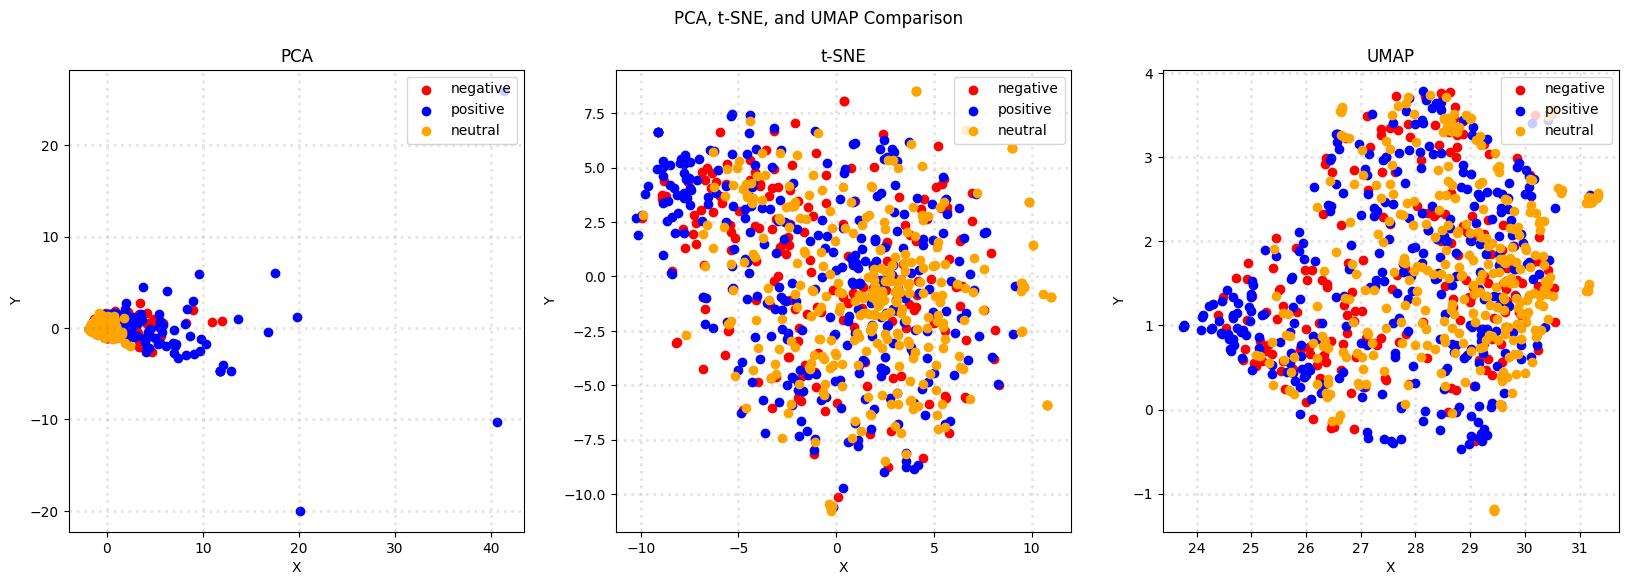

In [25]:
# Plot the results in subplots
col = ['red', 'blue', 'orange']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, df_reduced, title):
    for c, sentiment_name in zip(col, categories_text):
        xs = df_reduced[new_df['sentiment_modify'] == sentiment_name].T[0]
        ys = df_reduced[new_df['sentiment_modify'] == sentiment_name].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment_name)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], pca_tdm, 'PCA')
plot_scatter(axes[1], tsne_tdm, 't-SNE')
plot_scatter(axes[2], umap_tdm, 'UMAP')

plt.show()

In [26]:
# Try dimensionality reduction on augmented data
pca_aug = PCA(n_components=2).fit_transform(df_augmented.values)
tsne_aug = TSNE(n_components=2).fit_transform(df_augmented.values)
umap_aug = umap.UMAP(n_components=2).fit_transform(df_augmented.values)

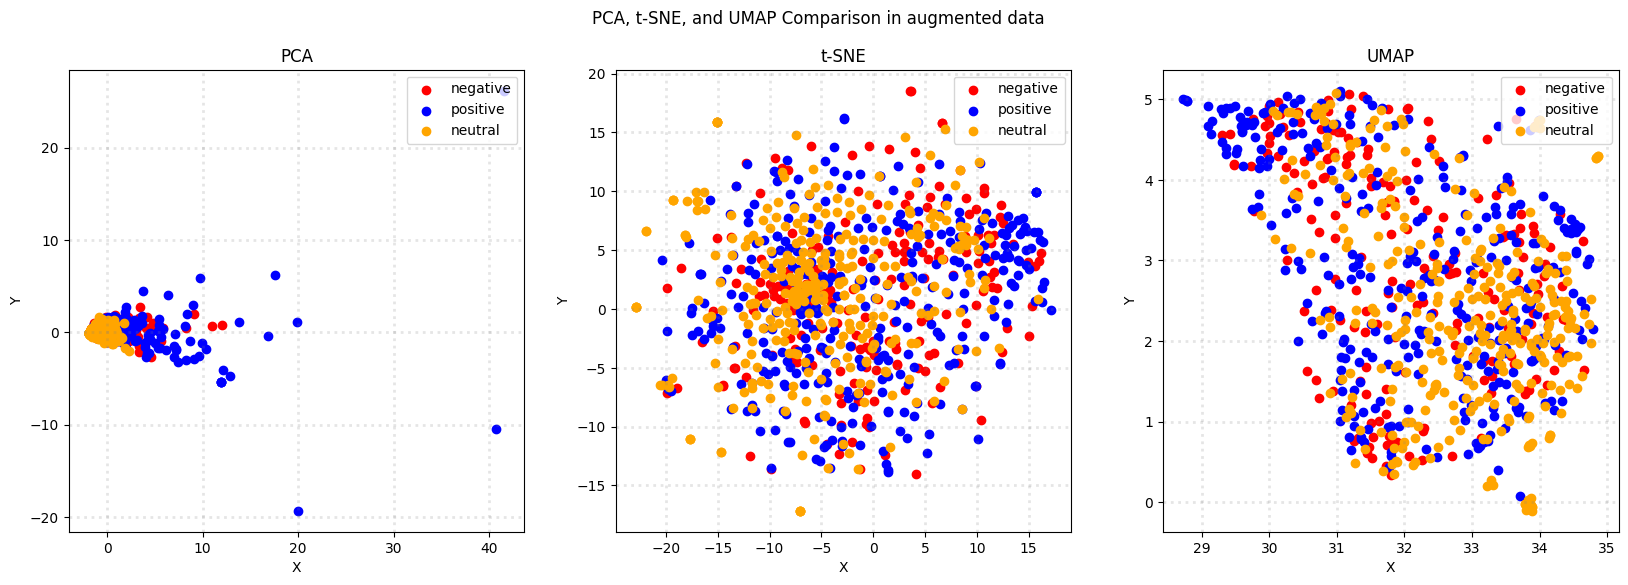

In [27]:
# Plot the results in subplots
col = ['red', 'blue', 'orange']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison in augmented data')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, df_reduced, title):
    for c, sentiment_name in zip(col, categories_text):
        xs = df_reduced[new_df['sentiment_modify'] == sentiment_name].T[0]
        ys = df_reduced[new_df['sentiment_modify'] == sentiment_name].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment_name)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], pca_aug, 'PCA')
plot_scatter(axes[1], tsne_aug, 't-SNE')
plot_scatter(axes[2], umap_aug, 'UMAP')

plt.show()

In [28]:
# Try on 3 dimension

#Use of df_tdm (document-term frequency data only)
pca_tdm_3D = PCA(n_components=3).fit_transform(df_tdm.values)
tsne_tdm_3D = TSNE(n_components=3).fit_transform(df_tdm.values)
umap_tdm_3D = umap.UMAP(n_components=3).fit_transform(df_tdm.values)

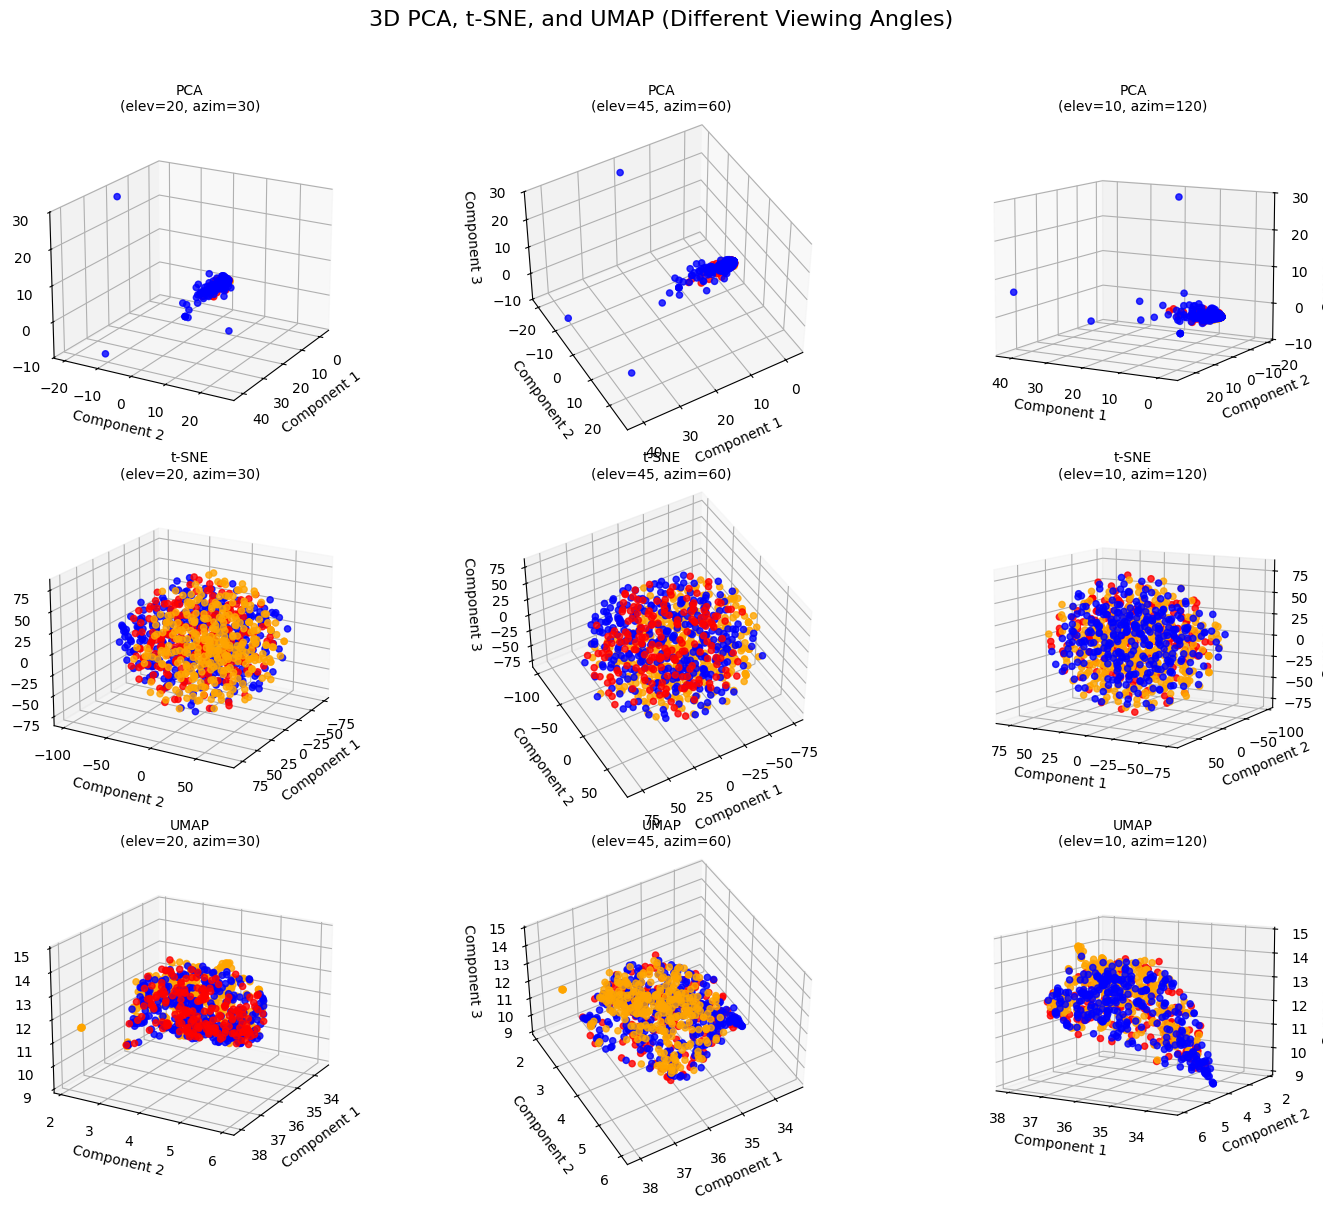

In [29]:
col = ['red', 'blue', 'orange']

# 3D plotting function remains the same
def plot_scatter_3d(ax, X_reduced, title, elev=20, azim=30):
    for c, sentiment_name in zip(col, categories_text):
        xs = df_reduced[new_df['sentiment_modify'] == sentiment_name].T[0]
        ys = df_reduced[new_df['sentiment_modify'] == sentiment_name].T[1]
        zs = df_reduced[new_df['sentiment_modify'] == sentiment_name].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=sentiment_name, alpha=0.8)

    ax.view_init(elev=elev, azim=azim)
    ax.set_title(f"{title}\n(elev={elev}, azim={azim})", fontsize=10)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.grid(color='gray', linestyle=':', linewidth=0.5, alpha=0.4)

# 3 angle combinations
angles = [(20, 30), (45, 60), (10, 120)]

# 3 methods
methods = [
    ('PCA', pca_tdm_3D),
    ('t-SNE', tsne_tdm_3D),
    ('UMAP', umap_tdm_3D)
]

# Create 3×3 figure
fig = plt.figure(figsize=(15, 12))
fig.suptitle('3D PCA, t-SNE, and UMAP (Different Viewing Angles)', fontsize=16)

# Nested loop: row = method, col = angle
for i, (method_name, df_reduced) in enumerate(methods):
    for j, (elev, azim) in enumerate(angles):
        ax = fig.add_subplot(3, 3, i * 3 + j + 1, projection='3d')
        plot_scatter_3d(ax, df_reduced, method_name, elev, azim)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for title
plt.show()


# Discretization and Binarization

In [30]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [31]:
mlb = preprocessing.LabelBinarizer()

In [32]:
mlb.fit(new_df.sentiment_modify)

LabelBinarizer()

In [33]:
new_df['sentiment_bin'] = mlb.transform(new_df['sentiment_modify']).tolist()

In [34]:
new_df

,type,datetime,subreddit,title,text,sentiment,sentiment_modify,tokenized_text,sentiment_bin
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,-1.0,negative,"{retards, on, Calls}","[1, 0, 0]"
1,comment,2025-04-12 1:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,1.0,positive,"{starting, as, did, why, should, deal, in, the...","[0, 0, 1]"
2,comment,2025-04-10 15:09:41,StockMarket,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.0,neutral,"{in, the, of, red, Seeing, ticker., lots}","[0, 1, 0]"
3,post,2023-08-30 17:12:55,stockstobuytoday,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,1.0,positive,"{seats, new, Points**, electric, has, Torrente...","[0, 0, 1]"
4,comment,2025-04-11 14:48:05,StockMarket,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,0.0,neutral,"{you., thank, didn’t, say, He}","[0, 1, 0]"
...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Invest now it is going to shoot up tomorrow,0.0,neutral,"{tomorrow, now, it, going, up, to, is, shoot, ...","[0, 1, 0]"
843,comment,2025-04-11 5:01:24,StockMarket,$ U.S. dollar value (crashing),Where can I read this?,0.0,neutral,"{I, read, this?, can, Where}","[0, 1, 0]"
844,post,2025-03-24 12:30:39,stockstobuytoday,Analyst Recommendations,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.0,neutral,"{Recommendations, Downgrades, &, |, Analyst, U...","[0, 1, 0]"
845,comment,2025-04-11 20:13:26,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,i sold my puts so i expect cheeto to declare w...,0.0,neutral,"{so, declare, i, cheeto, war, sold, puts, my, ...","[0, 1, 0]"


In [35]:
from sklearn.metrics.pairwise import cosine_similarity

# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = new_df[new_df['sentiment_modify']=='positive'].iloc[150]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)
document_vector_count_1 = count_vect.transform(document_to_transform_1)

document_to_transform_2 = []
random_record_2 = new_df[new_df['sentiment_modify']=='negative'].iloc[150]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)
document_vector_count_2 = count_vect.transform(document_to_transform_2)

document_to_transform_3 = []
random_record_3 = new_df[new_df['sentiment_modify']=='neutral'].iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.029527
Cosine Similarity using count bw 1 and 3: 0.127343
Cosine Similarity using count bw 2 and 3: 0.092748
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\hax16\AppData\Local\Temp\ipykernel_13016\3473603658.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
C:\Users\hax16\AppData\Local\Temp\ipykernel_13016\3473603658.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
C:\Users\hax16\AppData\Local\Temp\ipykernel_13016\3473603658.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this o

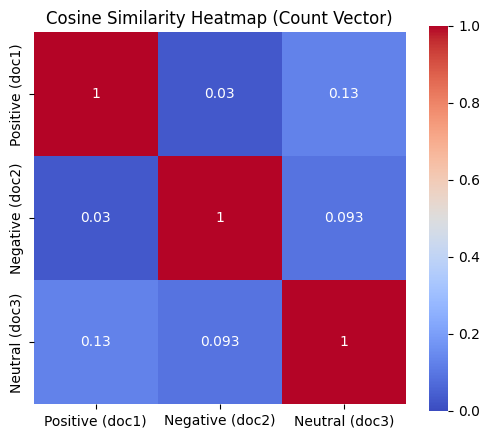

In [36]:
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2)[0][0]
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3)[0][0]
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3)[0][0]

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1)[0][0]
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2)[0][0]
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3)[0][0]

import seaborn as sns

# Create a 3×3 matrix
sim_matrix = np.array([
    [cos_sim_count_1_1, cos_sim_count_1_2, cos_sim_count_1_3],
    [cos_sim_count_1_2, cos_sim_count_2_2, cos_sim_count_2_3],
    [cos_sim_count_1_3, cos_sim_count_2_3, cos_sim_count_3_3]
])

labels = ['Positive (doc1)', 'Negative (doc2)', 'Neutral (doc3)']
sim_df = pd.DataFrame(sim_matrix, index=labels, columns=labels)

plt.figure(figsize=(6,5))
sns.heatmap(sim_df, annot=True, cmap="coolwarm", vmin=0, vmax=1, square=True)
plt.title("Cosine Similarity Heatmap (Count Vector)")
plt.show()

# Data Classification

In [68]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

sentiment_mapping = {-1.0: 'negative', 0.0: 'neutral', 1.0: 'positive'}

# Convert the numerical category labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (80% train, 20% test) , using the df_tdm (term-document dataset)
X_train, X_test, y_train, y_test = train_test_split(df_tdm, new_df['sentiment_modify'], test_size=0.2, random_state=25)

In [69]:
X_train

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5235294117647059

Classification Report:
               precision    recall  f1-score   support

    negative     0.4186    0.4737    0.4444        38
     neutral     0.7714    0.3803    0.5094        71
    positive     0.4783    0.7213    0.5752        61

    accuracy                         0.5235       170
   macro avg     0.5561    0.5251    0.5097       170
weighted avg     0.5874    0.5235    0.5185       170



In [71]:
# Try with the augmented data
# Split the data into training and testing sets (80% train, 20% test), using the augmented dataset
X_aug_train, X_aug_test, y_aug_train, y_aug_test = train_test_split(df_augmented, new_df['sentiment_modify'], test_size=0.2, random_state=25)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_aug_train, y_aug_train)

# Make predictions on the test set
y_aug_pred = nb_classifier.predict(X_aug_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_aug_test, y_aug_pred))
print("\nClassification Report:\n", classification_report(y_aug_test, y_aug_pred, target_names=target_names, digits=4))

Accuracy: 0.5294117647058824

Classification Report:
               precision    recall  f1-score   support

    negative     0.4828    0.3684    0.4179        38
     neutral     0.8462    0.3099    0.4536        71
    positive     0.4696    0.8852    0.6136        61

    accuracy                         0.5294       170
   macro avg     0.5995    0.5212    0.4951       170
weighted avg     0.6298    0.5294    0.5031       170



In [75]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_tdm, new_df['sentiment_modify'], test_size=0.2, random_state=25)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.5823529411764706

Classification Report:
               precision    recall  f1-score   support

    negative     0.3611    0.3421    0.3514        38
     neutral     0.6163    0.7465    0.6752        71
    positive     0.6875    0.5410    0.6055        61

    accuracy                         0.5824       170
   macro avg     0.5550    0.5432    0.5440       170
weighted avg     0.5848    0.5824    0.5778       170



In [74]:
# Decision Tree with the augmented frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df_augmented, new_df['sentiment_modify'], test_size=0.2, random_state=25)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.5941176470588235

Classification Report:
               precision    recall  f1-score   support

    negative     0.3810    0.4211    0.4000        38
     neutral     0.6235    0.7465    0.6795        71
    positive     0.7442    0.5246    0.6154        61

    accuracy                         0.5941       170
   macro avg     0.5829    0.5640    0.5650       170
weighted avg     0.6126    0.5941    0.5940       170



# Try with TF-IDF

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = new_df['text']
y = new_df['sentiment_modify']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vect = TfidfVectorizer()
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

In [77]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5235294117647059

Classification Report:
               precision    recall  f1-score   support

    negative     1.0000    0.1111    0.2000        36
     neutral     0.7273    0.3529    0.4752        68
    positive     0.4586    0.9242    0.6131        66

    accuracy                         0.5235       170
   macro avg     0.7286    0.4628    0.4294       170
weighted avg     0.6807    0.5235    0.4705       170



In [78]:
# Try with Complement Naive Bayes

from sklearn.naive_bayes import ComplementNB

nb_tfidf = ComplementNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tfidf, target_names=target_names, digits=4))

Accuracy: 0.5117647058823529

Classification Report:
               precision    recall  f1-score   support

    negative     0.3333    0.3056    0.3188        36
     neutral     0.7500    0.2647    0.3913        68
    positive     0.5133    0.8788    0.6480        66

    accuracy                         0.5118       170
   macro avg     0.5322    0.4830    0.4527       170
weighted avg     0.5699    0.5118    0.4756       170



In [79]:
# Try improving TF-IDF with n-gram parameters

X = new_df['text']
y = new_df['sentiment_modify']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=3, max_df=0.85)
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5470588235294118

Classification Report:
               precision    recall  f1-score   support

    negative     0.8571    0.1667    0.2791        36
     neutral     0.6481    0.5147    0.5738        68
    positive     0.4771    0.7879    0.5943        66

    accuracy                         0.5471       170
   macro avg     0.6608    0.4898    0.4824       170
weighted avg     0.6260    0.5471    0.5193       170



Although the general accuracy score when applying TF-IDF and complement Naive Bayes is around 2-3%, the precision did improve a lot

# Try preprocessing

In [83]:
import re
import pandas as pd

def clean_text(text):
    text = text.lower()                                     # lowercasing
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)     # remove URLs
    text = re.sub(r'@\w+|\#', '', text)                     # remove @mentions and hashtags
    text = re.sub(r'[^a-z\s]', '', text)                    # keep letters only
    text = re.sub(r'\s+', ' ', text).strip()                # normalize whitespace
    return text

new_df['clean_text'] = new_df['text'].astype(str).apply(clean_text)

In [90]:
from sklearn.model_selection import train_test_split

X = new_df['clean_text']
y = new_df['sentiment_modify']

# try stratify=y to prevent class imbalance from hurting training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify=y) 

In [91]:
#Try new dataset after preprocessing again with CountVect and TF-IDF Vectorizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vect = CountVectorizer()
X_train_count = count_vect.fit_transform(X_train)
X_test_count = count_vect.transform(X_test)

tfidf_vect = TfidfVectorizer()
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

In [89]:
# Train with Mutinomial Naive Bayes

nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train)
y_pred = nb_count.predict(X_test_count)

print("=== Count Vectorizer + MultinomialNB ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred = nb_tfidf.predict(X_test_tfidf)

print("=== TF-IDF + MultinomialNB ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

=== Count Vectorizer + MultinomialNB ===
Accuracy: 0.4764705882352941
              precision    recall  f1-score   support

    negative       0.46      0.28      0.34        40
     neutral       0.65      0.26      0.37        66
    positive       0.44      0.83      0.58        64

    accuracy                           0.48       170
   macro avg       0.52      0.45      0.43       170
weighted avg       0.53      0.48      0.44       170

=== TF-IDF + MultinomialNB ===
Accuracy: 0.4823529411764706
              precision    recall  f1-score   support

    negative       1.00      0.03      0.05        40
     neutral       0.67      0.39      0.50        66
    positive       0.42      0.86      0.57        64

    accuracy                           0.48       170
   macro avg       0.70      0.43      0.37       170
weighted avg       0.65      0.48      0.42       170



In [93]:
# Try with Complement NB
from sklearn.naive_bayes import ComplementNB

nb_tfidf = ComplementNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

print("=== TF-IDF + ComplementNB ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))

=== TF-IDF + ComplementNB ===
Accuracy: 0.5
              precision    recall  f1-score   support

    negative       0.41      0.35      0.38        40
     neutral       0.69      0.27      0.39        66
    positive       0.48      0.83      0.61        64

    accuracy                           0.50       170
   macro avg       0.53      0.48      0.46       170
weighted avg       0.55      0.50      0.47       170

